# Vanilla GANs


In [1]:
%matplotlib inline

import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
from torchvision import datasets
import torchvision.transforms as transforms

# number of subprocesses to use for data loading
num_workers = 4
# how many samples per batch to load
batch_size = 128

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# get the training datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)

# prepare data loader
train_loader = torch.utils.data.DataLoader(train_data, 
                                           batch_size=batch_size,
                                           num_workers=num_workers)

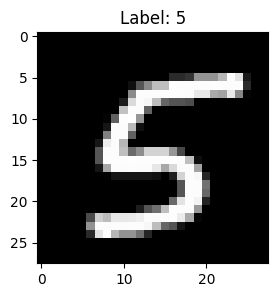

In [3]:
# obtain one batch of training images
rand_index = np.random.randint(0, len(train_data), 1)[0]
images = train_data[rand_index][0]
label = train_data[rand_index][1]
images = images.numpy()

# get one image from the batch
img = np.squeeze(images[0])

fig = plt.figure(figsize = (3,3)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
plt.title(f'Label: {label}')
plt.show()

### Model Hyperparameters

In [4]:
# Discriminator hyperparams

# Size of input image to discriminator (28*28)
input_size = 784
# Size of last hidden layer in the discriminator
d_hidden_size = 256

# Generator hyperparams

# Size of latent vector to give to generator
z_size = 100
# Size of discriminator output (generated image)
g_output_size = 784
# Size of first hidden layer in the generator
g_hidden_size = 32

### Complete Network

In [5]:
from models import Discriminator_vanilla, Generator_vanilla

In [6]:
D = Discriminator_vanilla( input_size, d_hidden_size)
G = Generator_vanilla(z_size, g_hidden_size, g_output_size)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model_D = D.to(device)
model_G = G.to(device)

### Discriminator and Generator Losses

In [7]:
from loss import real_loss_vanilla, fake_loss_vanilla

### Optimizers

In [8]:
import torch.optim as optim
from torch.optim.lr_scheduler import MultiStepLR

# Optimizers
lr_G = 0.001
lr_D = 0.0001
num_epochs = 100

# Create optimizers for the discriminator and generator
d_optimizer = optim.Adam(model_D.parameters(), lr=lr_D, betas=(0.5, 0.999))
g_optimizer = optim.Adam(model_G.parameters(), lr=lr_G, betas=(0.5, 0.999))

# Learning rate scheduler
# Set the list of milestones when you want to adjust the learning rate
d_milestones = [50]
g_milestones = [20, 50, 80]

d_scheduler = MultiStepLR(d_optimizer, milestones=d_milestones, gamma=0.1)
g_scheduler = MultiStepLR(g_optimizer, milestones=g_milestones, gamma=0.5)

---
### Training

Training will involve alternating between training the discriminator and the generator. We'll use our functions `real_loss` and `fake_loss` to help us calculate the discriminator losses in all of the following cases.

#### Discriminator training
1. Compute the discriminator loss on real, training images        
2. Generate fake images
3. Compute the discriminator loss on fake, generated images     
4. Add up real and fake loss
5. Perform backpropagation + an optimization step to update the discriminator's weights

#### Generator training
1. Generate fake images
2. Compute the discriminator loss on fake images, using **flipped** labels!
3. Perform backpropagation + an optimization step to update the generator's weights

##### Saving Samples

As we train, we'll also print out some loss statistics and save some generated "fake" samples.

In [9]:
from training_helper import training

2024-03-07 07:03:38 | Epoch [1/100] | Batch 0/469 | d_loss: 1.4754 | g_loss: 0.6567
2024-03-07 07:03:39 | Epoch [1/100] | Batch 100/469 | d_loss: 1.3789 | g_loss: 0.7307
2024-03-07 07:03:40 | Epoch [1/100] | Batch 200/469 | d_loss: 1.2915 | g_loss: 0.8020
2024-03-07 07:03:41 | Epoch [1/100] | Batch 300/469 | d_loss: 1.1911 | g_loss: 0.8369
2024-03-07 07:03:42 | Epoch [1/100] | Batch 400/469 | d_loss: 1.2970 | g_loss: 0.9582


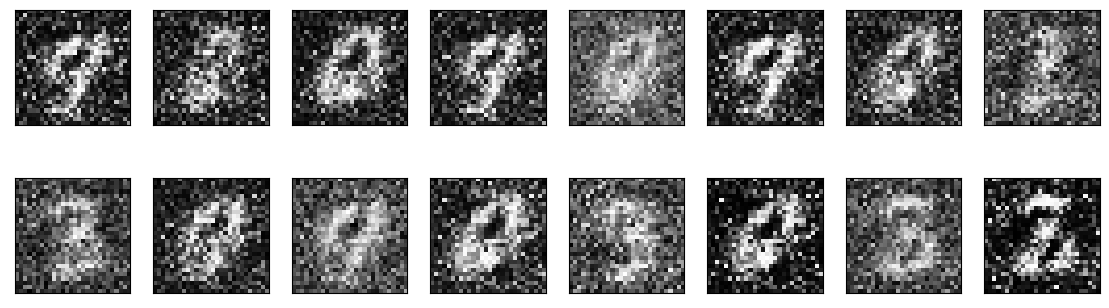

2024-03-07 07:03:44 | Epoch [2/100] | Batch 0/469 | d_loss: 1.3411 | g_loss: 0.8540
2024-03-07 07:03:45 | Epoch [2/100] | Batch 100/469 | d_loss: 1.1650 | g_loss: 1.0521
2024-03-07 07:03:47 | Epoch [2/100] | Batch 200/469 | d_loss: 1.2967 | g_loss: 1.1179
2024-03-07 07:03:48 | Epoch [2/100] | Batch 300/469 | d_loss: 1.1967 | g_loss: 1.0189
2024-03-07 07:03:50 | Epoch [2/100] | Batch 400/469 | d_loss: 1.1694 | g_loss: 1.1704


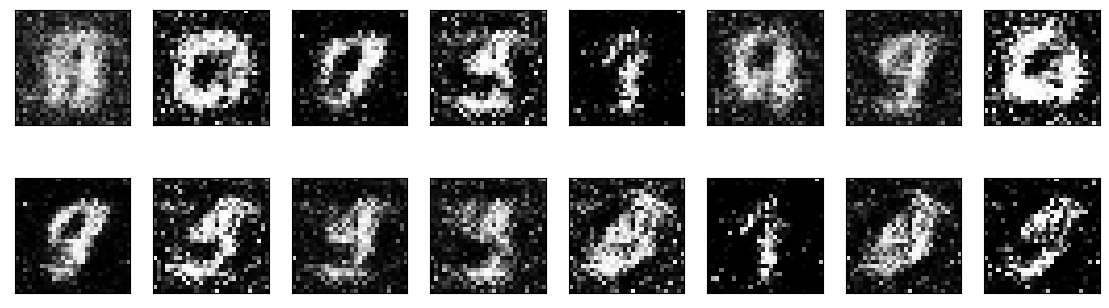

2024-03-07 07:03:51 | Epoch [3/100] | Batch 0/469 | d_loss: 1.3181 | g_loss: 1.3483
2024-03-07 07:03:52 | Epoch [3/100] | Batch 100/469 | d_loss: 1.2106 | g_loss: 1.1261
2024-03-07 07:03:54 | Epoch [3/100] | Batch 200/469 | d_loss: 1.2282 | g_loss: 1.1354
2024-03-07 07:03:55 | Epoch [3/100] | Batch 300/469 | d_loss: 1.1498 | g_loss: 1.3016
2024-03-07 07:03:56 | Epoch [3/100] | Batch 400/469 | d_loss: 1.1607 | g_loss: 1.2019


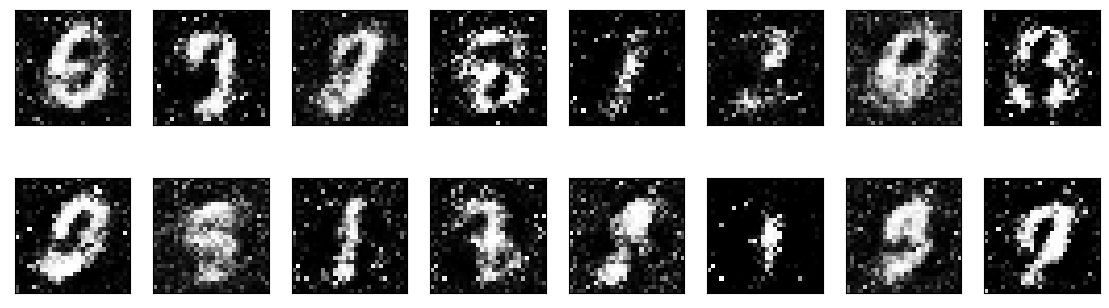

2024-03-07 07:03:58 | Epoch [4/100] | Batch 0/469 | d_loss: 1.2700 | g_loss: 1.2313
2024-03-07 07:03:59 | Epoch [4/100] | Batch 100/469 | d_loss: 1.1448 | g_loss: 1.4875
2024-03-07 07:04:00 | Epoch [4/100] | Batch 200/469 | d_loss: 1.0841 | g_loss: 1.2638
2024-03-07 07:04:02 | Epoch [4/100] | Batch 300/469 | d_loss: 1.2253 | g_loss: 1.3458
2024-03-07 07:04:03 | Epoch [4/100] | Batch 400/469 | d_loss: 1.2007 | g_loss: 1.7680


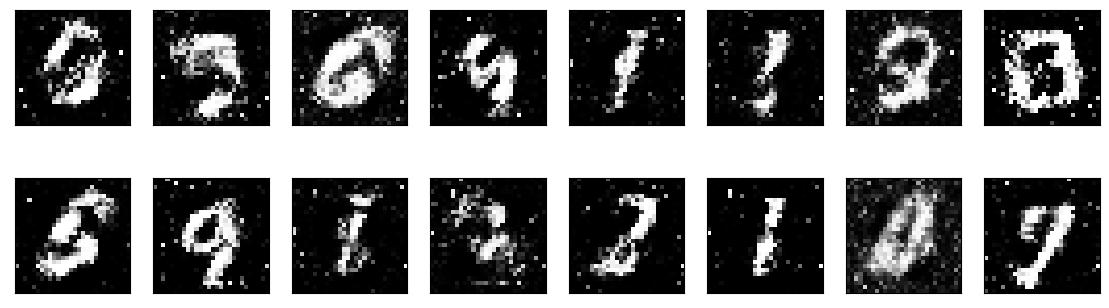

2024-03-07 07:04:05 | Epoch [5/100] | Batch 0/469 | d_loss: 1.2539 | g_loss: 1.4376
2024-03-07 07:04:06 | Epoch [5/100] | Batch 100/469 | d_loss: 1.1860 | g_loss: 1.0869
2024-03-07 07:04:08 | Epoch [5/100] | Batch 200/469 | d_loss: 1.0894 | g_loss: 1.4013
2024-03-07 07:04:09 | Epoch [5/100] | Batch 300/469 | d_loss: 1.0898 | g_loss: 1.2487
2024-03-07 07:04:11 | Epoch [5/100] | Batch 400/469 | d_loss: 1.1521 | g_loss: 1.4092


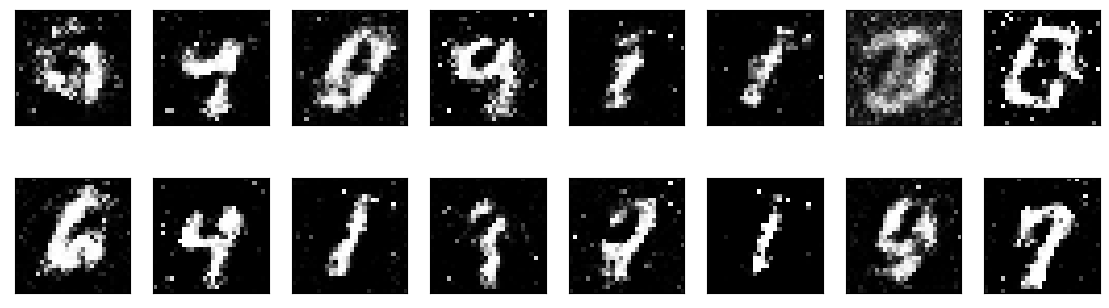

2024-03-07 07:04:13 | Epoch [6/100] | Batch 0/469 | d_loss: 1.3909 | g_loss: 2.3162
2024-03-07 07:04:14 | Epoch [6/100] | Batch 100/469 | d_loss: 1.2252 | g_loss: 1.2378
2024-03-07 07:04:15 | Epoch [6/100] | Batch 200/469 | d_loss: 1.1634 | g_loss: 1.5570
2024-03-07 07:04:16 | Epoch [6/100] | Batch 300/469 | d_loss: 1.1848 | g_loss: 1.3077
2024-03-07 07:04:18 | Epoch [6/100] | Batch 400/469 | d_loss: 1.2472 | g_loss: 1.0818


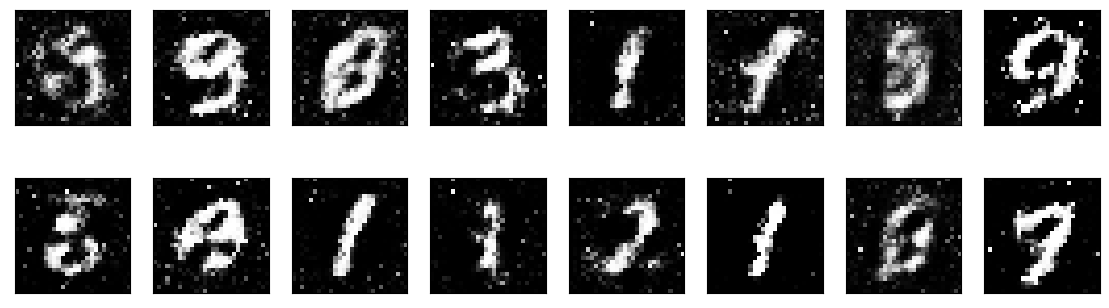

2024-03-07 07:04:19 | Epoch [7/100] | Batch 0/469 | d_loss: 1.3624 | g_loss: 1.3632
2024-03-07 07:04:21 | Epoch [7/100] | Batch 100/469 | d_loss: 1.2723 | g_loss: 1.2440
2024-03-07 07:04:22 | Epoch [7/100] | Batch 200/469 | d_loss: 1.1647 | g_loss: 1.1811
2024-03-07 07:04:23 | Epoch [7/100] | Batch 300/469 | d_loss: 1.2135 | g_loss: 1.2876
2024-03-07 07:04:25 | Epoch [7/100] | Batch 400/469 | d_loss: 1.1986 | g_loss: 1.1817


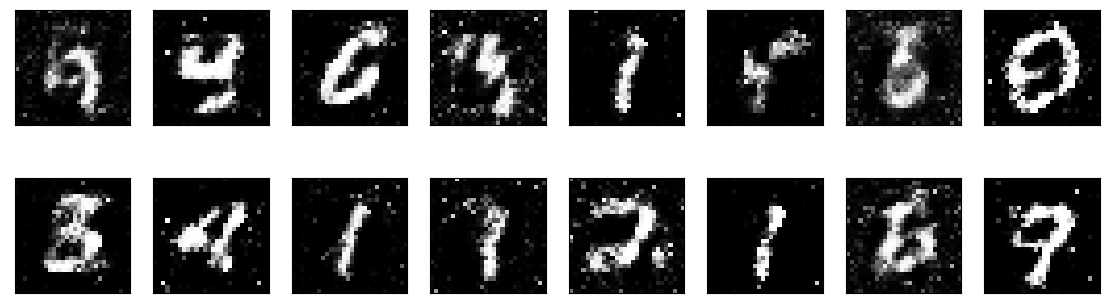

2024-03-07 07:04:27 | Epoch [8/100] | Batch 0/469 | d_loss: 1.2233 | g_loss: 1.2541
2024-03-07 07:04:28 | Epoch [8/100] | Batch 100/469 | d_loss: 1.2185 | g_loss: 0.9860
2024-03-07 07:04:29 | Epoch [8/100] | Batch 200/469 | d_loss: 1.2469 | g_loss: 1.1047
2024-03-07 07:04:31 | Epoch [8/100] | Batch 300/469 | d_loss: 1.2399 | g_loss: 1.2090
2024-03-07 07:04:32 | Epoch [8/100] | Batch 400/469 | d_loss: 1.1568 | g_loss: 1.0564


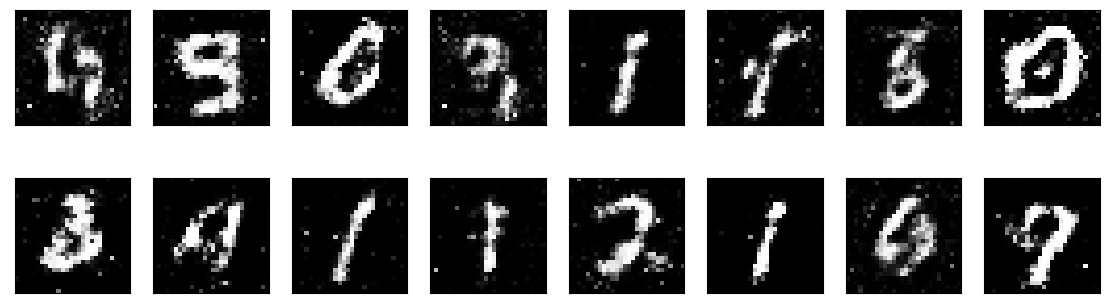

2024-03-07 07:04:34 | Epoch [9/100] | Batch 0/469 | d_loss: 1.2699 | g_loss: 1.1193
2024-03-07 07:04:35 | Epoch [9/100] | Batch 100/469 | d_loss: 1.3402 | g_loss: 1.0510
2024-03-07 07:04:37 | Epoch [9/100] | Batch 200/469 | d_loss: 1.2520 | g_loss: 1.0068
2024-03-07 07:04:38 | Epoch [9/100] | Batch 300/469 | d_loss: 1.2189 | g_loss: 1.0129
2024-03-07 07:04:40 | Epoch [9/100] | Batch 400/469 | d_loss: 1.2542 | g_loss: 0.9874


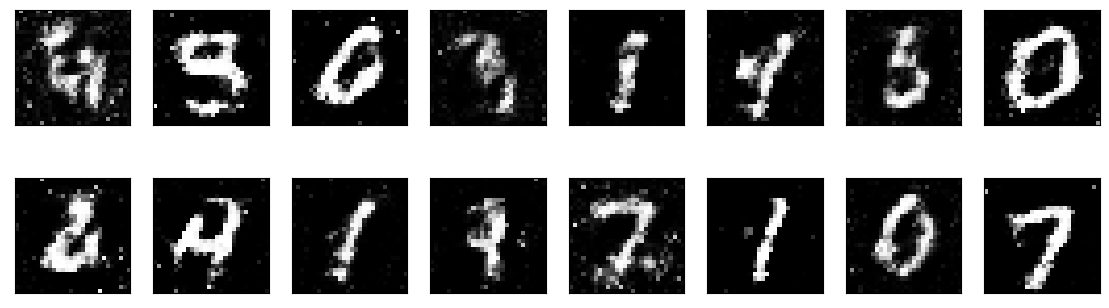

2024-03-07 07:04:42 | Epoch [10/100] | Batch 0/469 | d_loss: 1.2835 | g_loss: 1.1196
2024-03-07 07:04:43 | Epoch [10/100] | Batch 100/469 | d_loss: 1.2677 | g_loss: 0.9069
2024-03-07 07:04:44 | Epoch [10/100] | Batch 200/469 | d_loss: 1.1926 | g_loss: 1.1166
2024-03-07 07:04:46 | Epoch [10/100] | Batch 300/469 | d_loss: 1.2379 | g_loss: 1.0399
2024-03-07 07:04:47 | Epoch [10/100] | Batch 400/469 | d_loss: 1.2533 | g_loss: 1.0658


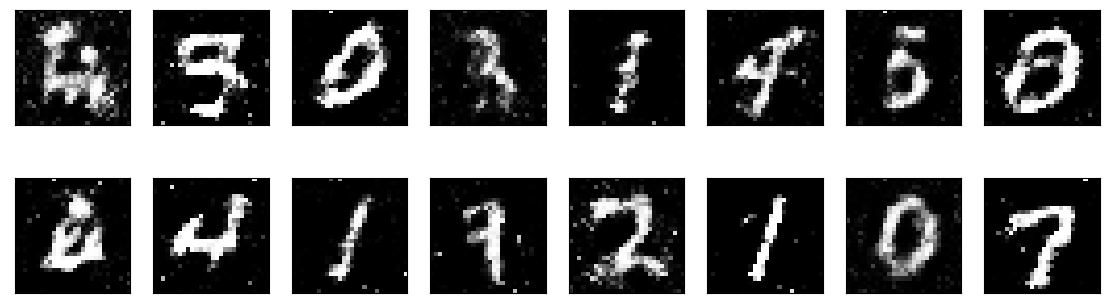

2024-03-07 07:04:49 | Epoch [11/100] | Batch 0/469 | d_loss: 1.3001 | g_loss: 0.9879
2024-03-07 07:04:50 | Epoch [11/100] | Batch 100/469 | d_loss: 1.2587 | g_loss: 0.9145
2024-03-07 07:04:52 | Epoch [11/100] | Batch 200/469 | d_loss: 1.2724 | g_loss: 1.0234
2024-03-07 07:04:53 | Epoch [11/100] | Batch 300/469 | d_loss: 1.2167 | g_loss: 1.0284
2024-03-07 07:04:54 | Epoch [11/100] | Batch 400/469 | d_loss: 1.3605 | g_loss: 1.1058


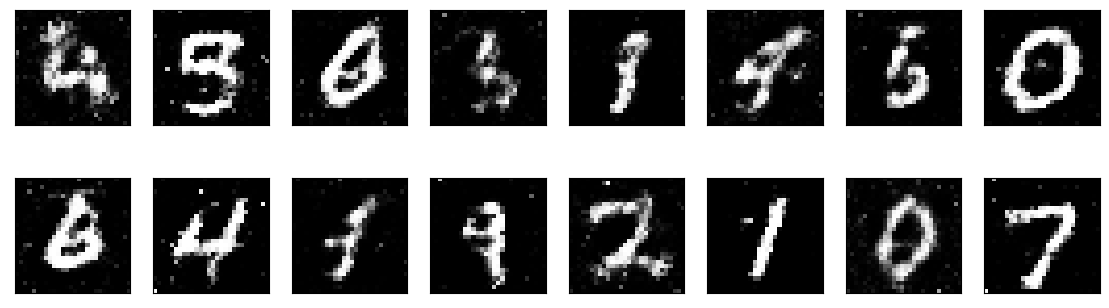

2024-03-07 07:04:56 | Epoch [12/100] | Batch 0/469 | d_loss: 1.3293 | g_loss: 1.2632
2024-03-07 07:04:57 | Epoch [12/100] | Batch 100/469 | d_loss: 1.3022 | g_loss: 0.9140
2024-03-07 07:04:58 | Epoch [12/100] | Batch 200/469 | d_loss: 1.2004 | g_loss: 0.9554
2024-03-07 07:04:59 | Epoch [12/100] | Batch 300/469 | d_loss: 1.2625 | g_loss: 0.9498
2024-03-07 07:05:01 | Epoch [12/100] | Batch 400/469 | d_loss: 1.3329 | g_loss: 0.9750


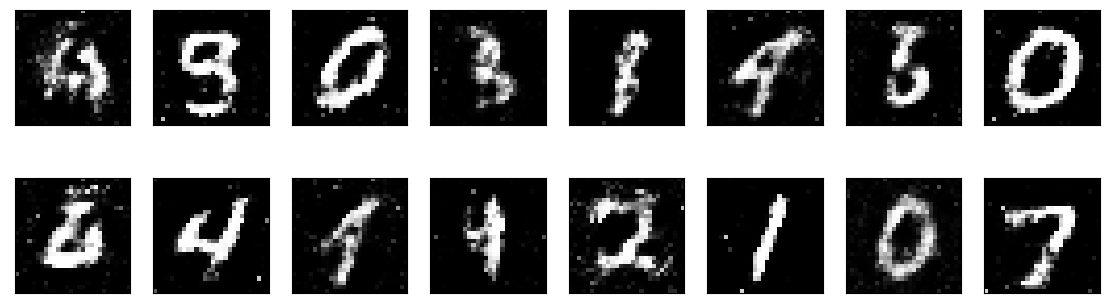

2024-03-07 07:05:02 | Epoch [13/100] | Batch 0/469 | d_loss: 1.3283 | g_loss: 1.1181
2024-03-07 07:05:04 | Epoch [13/100] | Batch 100/469 | d_loss: 1.2358 | g_loss: 1.2322
2024-03-07 07:05:05 | Epoch [13/100] | Batch 200/469 | d_loss: 1.2050 | g_loss: 1.2164
2024-03-07 07:05:06 | Epoch [13/100] | Batch 300/469 | d_loss: 1.2232 | g_loss: 0.9828
2024-03-07 07:05:08 | Epoch [13/100] | Batch 400/469 | d_loss: 1.2825 | g_loss: 0.9761


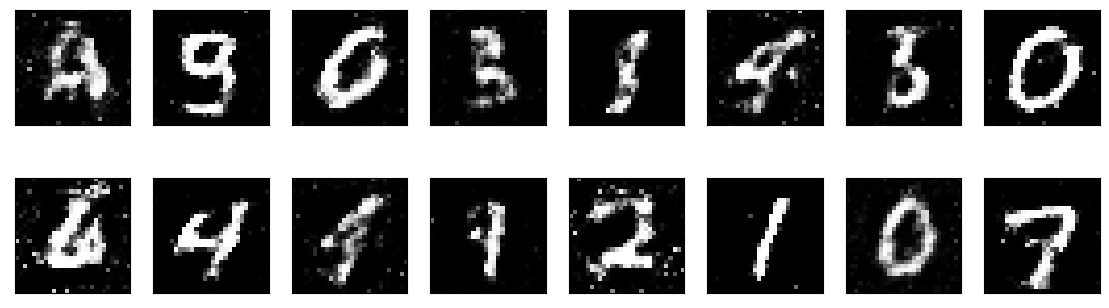

2024-03-07 07:05:10 | Epoch [14/100] | Batch 0/469 | d_loss: 1.2939 | g_loss: 1.0739
2024-03-07 07:05:11 | Epoch [14/100] | Batch 100/469 | d_loss: 1.2859 | g_loss: 1.0018
2024-03-07 07:05:12 | Epoch [14/100] | Batch 200/469 | d_loss: 1.2928 | g_loss: 1.1083
2024-03-07 07:05:14 | Epoch [14/100] | Batch 300/469 | d_loss: 1.1976 | g_loss: 0.9997
2024-03-07 07:05:15 | Epoch [14/100] | Batch 400/469 | d_loss: 1.3696 | g_loss: 0.9853


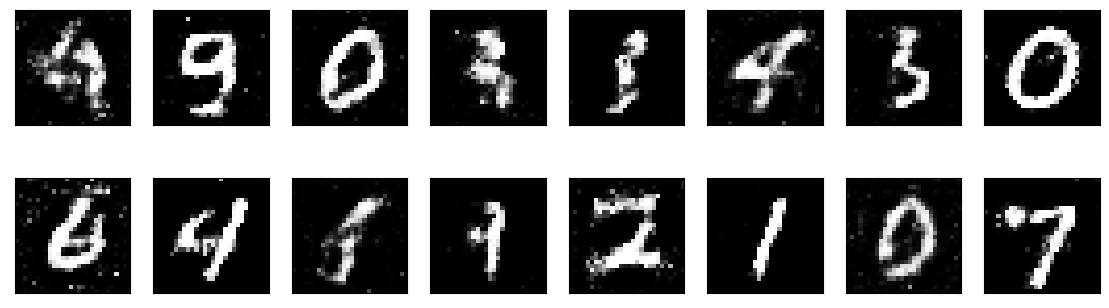

2024-03-07 07:05:17 | Epoch [15/100] | Batch 0/469 | d_loss: 1.3312 | g_loss: 1.1708
2024-03-07 07:05:18 | Epoch [15/100] | Batch 100/469 | d_loss: 1.2925 | g_loss: 1.0675
2024-03-07 07:05:20 | Epoch [15/100] | Batch 200/469 | d_loss: 1.2440 | g_loss: 0.9704
2024-03-07 07:05:21 | Epoch [15/100] | Batch 300/469 | d_loss: 1.3035 | g_loss: 1.0491
2024-03-07 07:05:23 | Epoch [15/100] | Batch 400/469 | d_loss: 1.3253 | g_loss: 1.0364


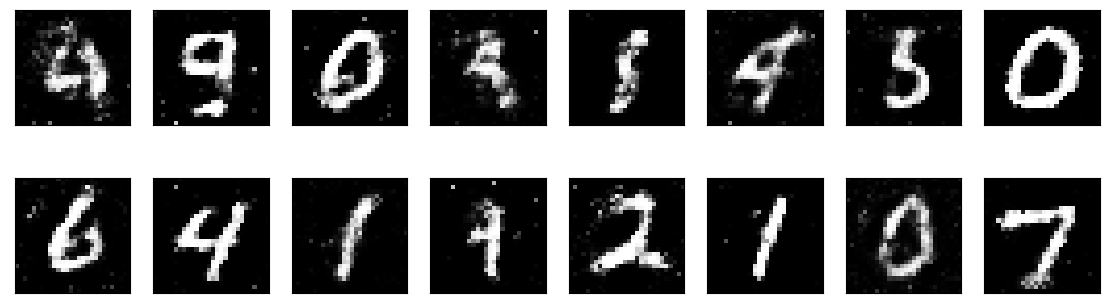

2024-03-07 07:05:25 | Epoch [16/100] | Batch 0/469 | d_loss: 1.2896 | g_loss: 0.9626
2024-03-07 07:05:26 | Epoch [16/100] | Batch 100/469 | d_loss: 1.2880 | g_loss: 1.0931
2024-03-07 07:05:28 | Epoch [16/100] | Batch 200/469 | d_loss: 1.2071 | g_loss: 1.0327
2024-03-07 07:05:29 | Epoch [16/100] | Batch 300/469 | d_loss: 1.2132 | g_loss: 1.0682
2024-03-07 07:05:31 | Epoch [16/100] | Batch 400/469 | d_loss: 1.3279 | g_loss: 1.0184


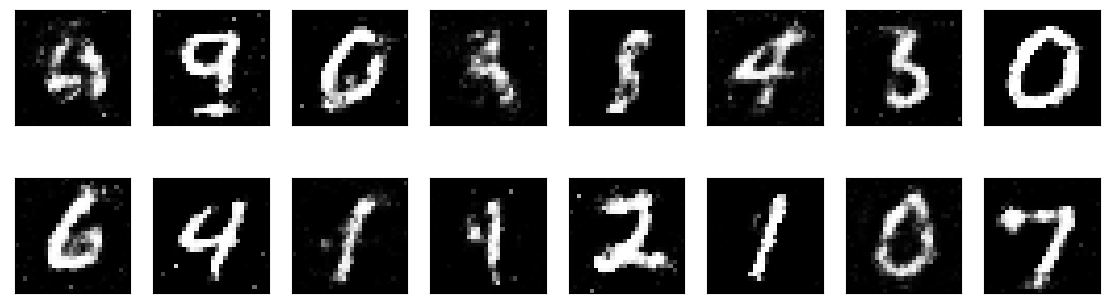

2024-03-07 07:05:33 | Epoch [17/100] | Batch 0/469 | d_loss: 1.2908 | g_loss: 1.0860
2024-03-07 07:05:35 | Epoch [17/100] | Batch 100/469 | d_loss: 1.3152 | g_loss: 0.9478
2024-03-07 07:05:36 | Epoch [17/100] | Batch 200/469 | d_loss: 1.2207 | g_loss: 1.1428
2024-03-07 07:05:37 | Epoch [17/100] | Batch 300/469 | d_loss: 1.1872 | g_loss: 1.0974
2024-03-07 07:05:39 | Epoch [17/100] | Batch 400/469 | d_loss: 1.3242 | g_loss: 0.9795


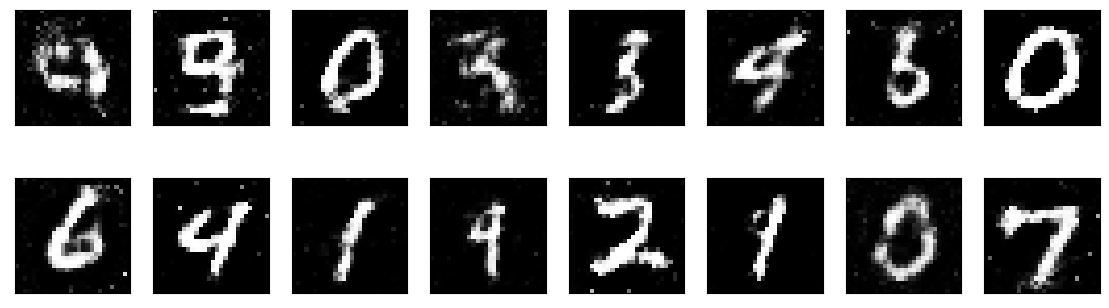

2024-03-07 07:05:40 | Epoch [18/100] | Batch 0/469 | d_loss: 1.3710 | g_loss: 1.2579
2024-03-07 07:05:41 | Epoch [18/100] | Batch 100/469 | d_loss: 1.2841 | g_loss: 1.1005
2024-03-07 07:05:43 | Epoch [18/100] | Batch 200/469 | d_loss: 1.2290 | g_loss: 0.9981
2024-03-07 07:05:44 | Epoch [18/100] | Batch 300/469 | d_loss: 1.2142 | g_loss: 1.0499
2024-03-07 07:05:45 | Epoch [18/100] | Batch 400/469 | d_loss: 1.3161 | g_loss: 1.1186


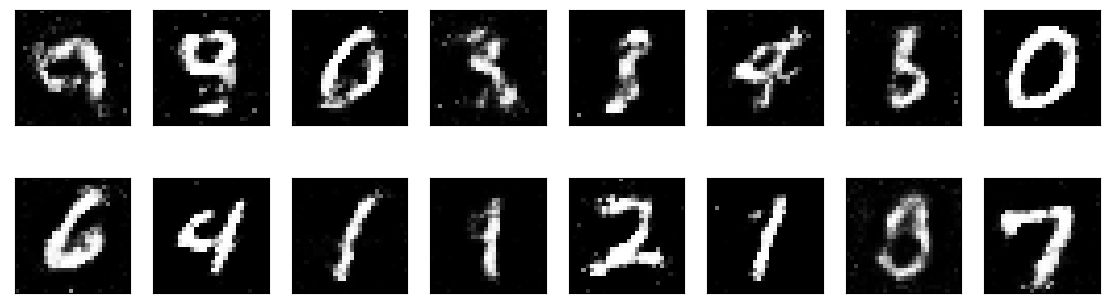

2024-03-07 07:05:47 | Epoch [19/100] | Batch 0/469 | d_loss: 1.2580 | g_loss: 1.1665
2024-03-07 07:05:48 | Epoch [19/100] | Batch 100/469 | d_loss: 1.3578 | g_loss: 0.9361
2024-03-07 07:05:49 | Epoch [19/100] | Batch 200/469 | d_loss: 1.2179 | g_loss: 1.0262
2024-03-07 07:05:50 | Epoch [19/100] | Batch 300/469 | d_loss: 1.1859 | g_loss: 1.1073
2024-03-07 07:05:52 | Epoch [19/100] | Batch 400/469 | d_loss: 1.3508 | g_loss: 1.2278


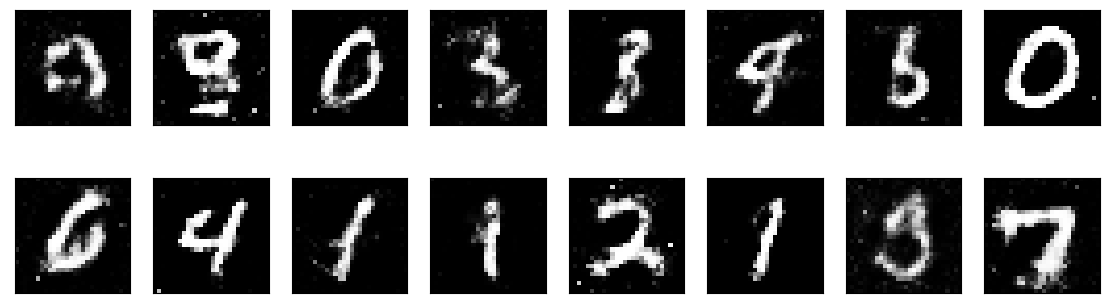

2024-03-07 07:05:54 | Epoch [20/100] | Batch 0/469 | d_loss: 1.3205 | g_loss: 1.1980
2024-03-07 07:05:55 | Epoch [20/100] | Batch 100/469 | d_loss: 1.2912 | g_loss: 1.0642
2024-03-07 07:05:57 | Epoch [20/100] | Batch 200/469 | d_loss: 1.2689 | g_loss: 1.1330
2024-03-07 07:05:58 | Epoch [20/100] | Batch 300/469 | d_loss: 1.1722 | g_loss: 1.0656
2024-03-07 07:06:00 | Epoch [20/100] | Batch 400/469 | d_loss: 1.3026 | g_loss: 1.0616


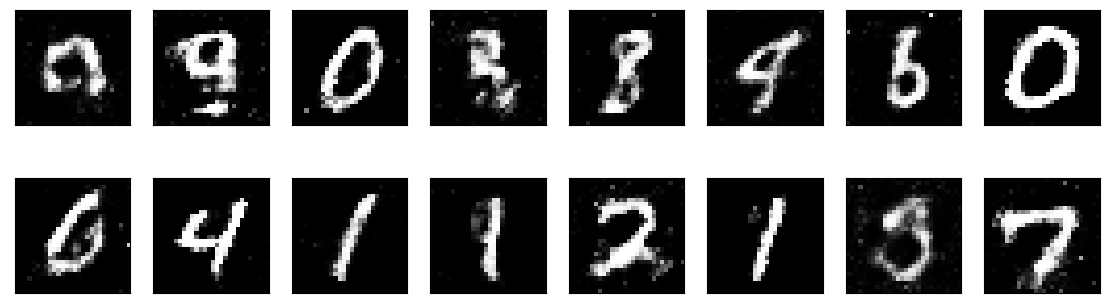

2024-03-07 07:06:02 | Epoch [21/100] | Batch 0/469 | d_loss: 1.3337 | g_loss: 0.9691
2024-03-07 07:06:03 | Epoch [21/100] | Batch 100/469 | d_loss: 1.2697 | g_loss: 1.0489
2024-03-07 07:06:04 | Epoch [21/100] | Batch 200/469 | d_loss: 1.2486 | g_loss: 1.0734
2024-03-07 07:06:06 | Epoch [21/100] | Batch 300/469 | d_loss: 1.2301 | g_loss: 1.1167
2024-03-07 07:06:07 | Epoch [21/100] | Batch 400/469 | d_loss: 1.2394 | g_loss: 1.0268


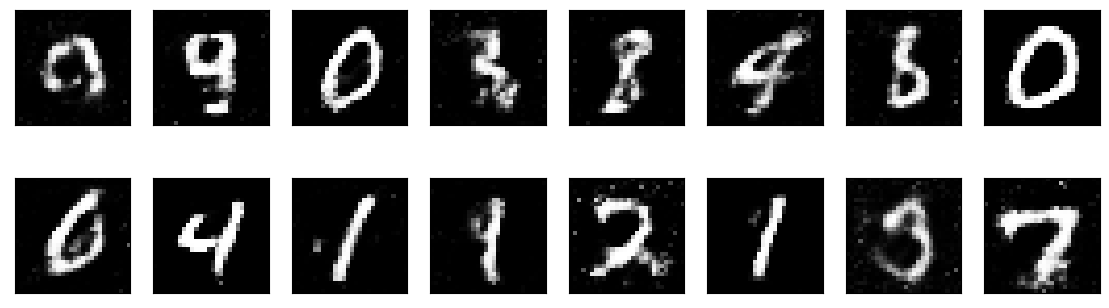

2024-03-07 07:06:09 | Epoch [22/100] | Batch 0/469 | d_loss: 1.2838 | g_loss: 1.0830
2024-03-07 07:06:10 | Epoch [22/100] | Batch 100/469 | d_loss: 1.2167 | g_loss: 1.0097
2024-03-07 07:06:12 | Epoch [22/100] | Batch 200/469 | d_loss: 1.2241 | g_loss: 1.0986
2024-03-07 07:06:13 | Epoch [22/100] | Batch 300/469 | d_loss: 1.1739 | g_loss: 1.1109
2024-03-07 07:06:14 | Epoch [22/100] | Batch 400/469 | d_loss: 1.3425 | g_loss: 1.0369


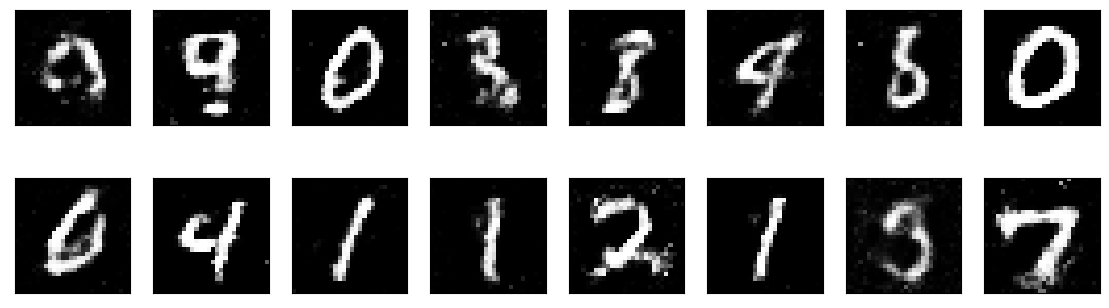

2024-03-07 07:06:16 | Epoch [23/100] | Batch 0/469 | d_loss: 1.3030 | g_loss: 1.2272
2024-03-07 07:06:17 | Epoch [23/100] | Batch 100/469 | d_loss: 1.1742 | g_loss: 1.0624
2024-03-07 07:06:18 | Epoch [23/100] | Batch 200/469 | d_loss: 1.2326 | g_loss: 1.2496
2024-03-07 07:06:20 | Epoch [23/100] | Batch 300/469 | d_loss: 1.1604 | g_loss: 1.0521
2024-03-07 07:06:21 | Epoch [23/100] | Batch 400/469 | d_loss: 1.1691 | g_loss: 0.9988


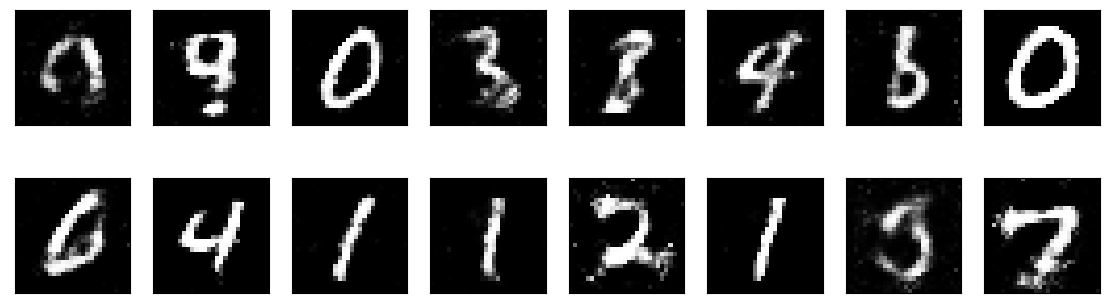

2024-03-07 07:06:23 | Epoch [24/100] | Batch 0/469 | d_loss: 1.2356 | g_loss: 1.1639
2024-03-07 07:06:24 | Epoch [24/100] | Batch 100/469 | d_loss: 1.2517 | g_loss: 1.3372
2024-03-07 07:06:25 | Epoch [24/100] | Batch 200/469 | d_loss: 1.1421 | g_loss: 1.2113
2024-03-07 07:06:26 | Epoch [24/100] | Batch 300/469 | d_loss: 1.1826 | g_loss: 1.2539
2024-03-07 07:06:28 | Epoch [24/100] | Batch 400/469 | d_loss: 1.2400 | g_loss: 1.1310


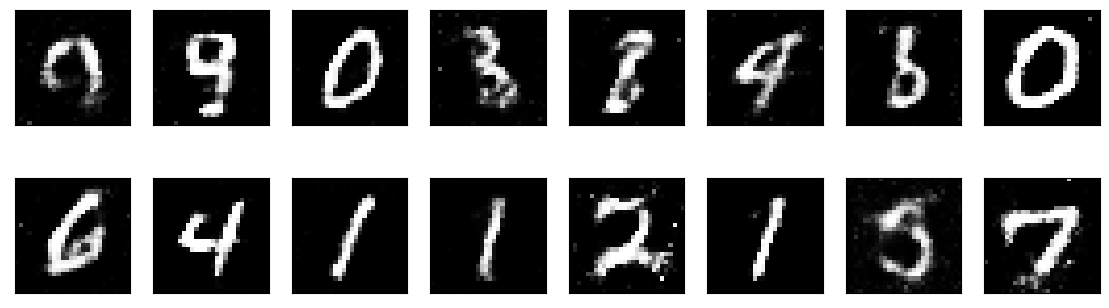

2024-03-07 07:06:30 | Epoch [25/100] | Batch 0/469 | d_loss: 1.2292 | g_loss: 1.0772
2024-03-07 07:06:31 | Epoch [25/100] | Batch 100/469 | d_loss: 1.2111 | g_loss: 1.0316
2024-03-07 07:06:32 | Epoch [25/100] | Batch 200/469 | d_loss: 1.1748 | g_loss: 1.2146
2024-03-07 07:06:33 | Epoch [25/100] | Batch 300/469 | d_loss: 1.1944 | g_loss: 1.0933
2024-03-07 07:06:35 | Epoch [25/100] | Batch 400/469 | d_loss: 1.3413 | g_loss: 1.1525


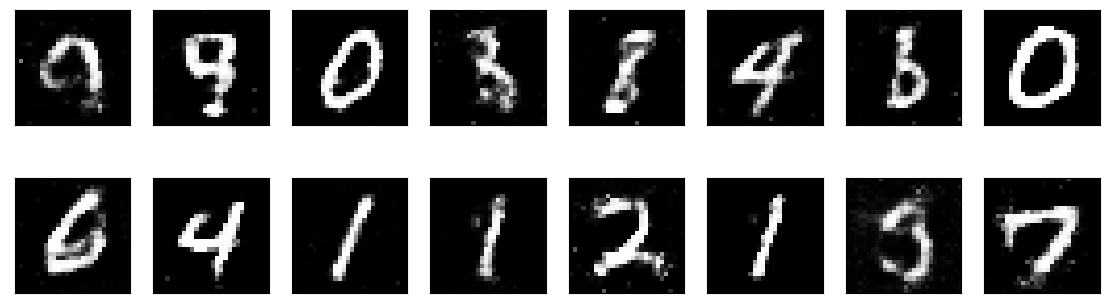

2024-03-07 07:06:36 | Epoch [26/100] | Batch 0/469 | d_loss: 1.2216 | g_loss: 1.1626
2024-03-07 07:06:38 | Epoch [26/100] | Batch 100/469 | d_loss: 1.1822 | g_loss: 1.2094
2024-03-07 07:06:39 | Epoch [26/100] | Batch 200/469 | d_loss: 1.2810 | g_loss: 1.1553
2024-03-07 07:06:41 | Epoch [26/100] | Batch 300/469 | d_loss: 1.2964 | g_loss: 1.3464
2024-03-07 07:06:42 | Epoch [26/100] | Batch 400/469 | d_loss: 1.3174 | g_loss: 1.2398


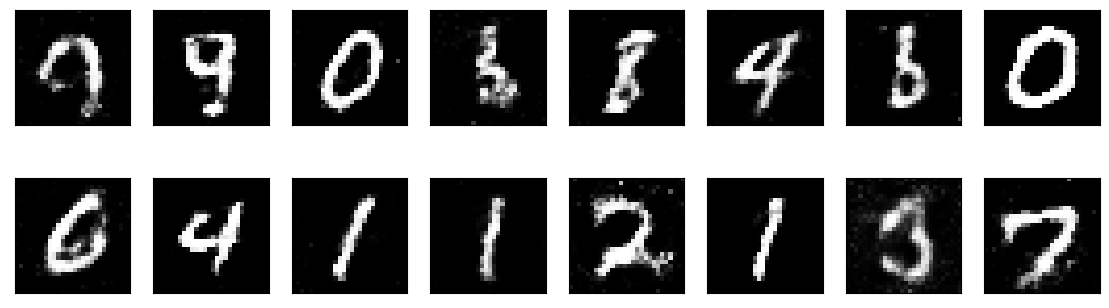

2024-03-07 07:06:44 | Epoch [27/100] | Batch 0/469 | d_loss: 1.2163 | g_loss: 1.4151
2024-03-07 07:06:46 | Epoch [27/100] | Batch 100/469 | d_loss: 1.1990 | g_loss: 1.1826
2024-03-07 07:06:47 | Epoch [27/100] | Batch 200/469 | d_loss: 1.2099 | g_loss: 1.3691
2024-03-07 07:06:49 | Epoch [27/100] | Batch 300/469 | d_loss: 1.1160 | g_loss: 1.0341
2024-03-07 07:06:50 | Epoch [27/100] | Batch 400/469 | d_loss: 1.2218 | g_loss: 1.2183


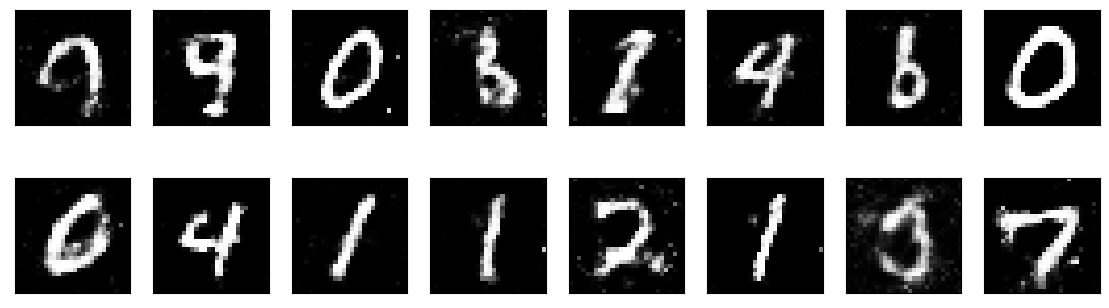

2024-03-07 07:06:52 | Epoch [28/100] | Batch 0/469 | d_loss: 1.1348 | g_loss: 1.1392
2024-03-07 07:06:54 | Epoch [28/100] | Batch 100/469 | d_loss: 1.1935 | g_loss: 1.3162
2024-03-07 07:06:55 | Epoch [28/100] | Batch 200/469 | d_loss: 1.1588 | g_loss: 1.2077
2024-03-07 07:06:56 | Epoch [28/100] | Batch 300/469 | d_loss: 1.1707 | g_loss: 1.3562
2024-03-07 07:06:58 | Epoch [28/100] | Batch 400/469 | d_loss: 1.3609 | g_loss: 1.3108


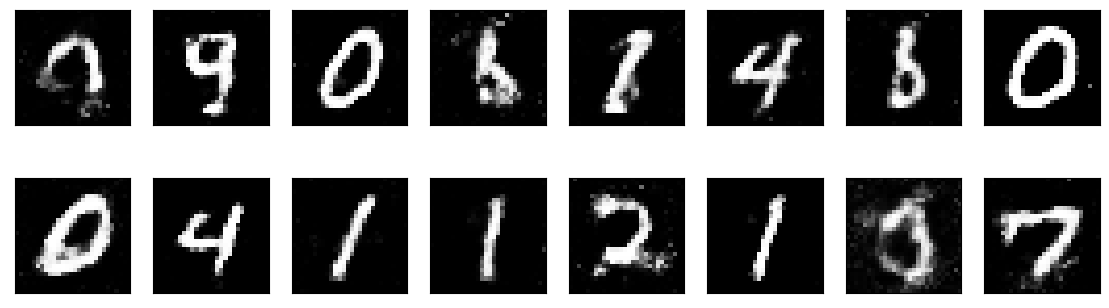

2024-03-07 07:07:00 | Epoch [29/100] | Batch 0/469 | d_loss: 1.2043 | g_loss: 1.3112
2024-03-07 07:07:01 | Epoch [29/100] | Batch 100/469 | d_loss: 1.1364 | g_loss: 1.3786
2024-03-07 07:07:03 | Epoch [29/100] | Batch 200/469 | d_loss: 1.1193 | g_loss: 1.3144
2024-03-07 07:07:04 | Epoch [29/100] | Batch 300/469 | d_loss: 1.1445 | g_loss: 1.2946
2024-03-07 07:07:05 | Epoch [29/100] | Batch 400/469 | d_loss: 1.2351 | g_loss: 1.1007


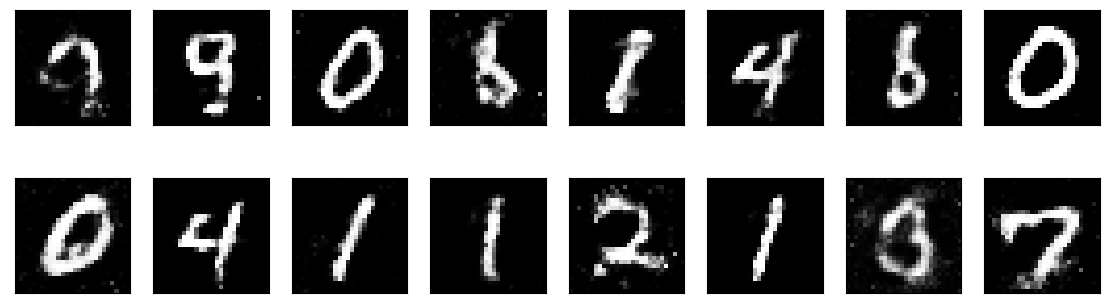

2024-03-07 07:07:07 | Epoch [30/100] | Batch 0/469 | d_loss: 1.1343 | g_loss: 1.0451
2024-03-07 07:07:08 | Epoch [30/100] | Batch 100/469 | d_loss: 1.1496 | g_loss: 1.3150
2024-03-07 07:07:09 | Epoch [30/100] | Batch 200/469 | d_loss: 1.1351 | g_loss: 1.3874
2024-03-07 07:07:10 | Epoch [30/100] | Batch 300/469 | d_loss: 1.1674 | g_loss: 1.1086
2024-03-07 07:07:11 | Epoch [30/100] | Batch 400/469 | d_loss: 1.2708 | g_loss: 1.2083


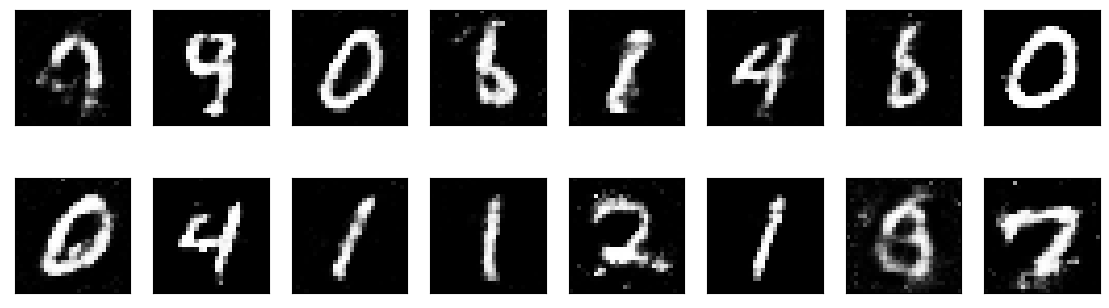

2024-03-07 07:07:13 | Epoch [31/100] | Batch 0/469 | d_loss: 1.1039 | g_loss: 1.1266
2024-03-07 07:07:14 | Epoch [31/100] | Batch 100/469 | d_loss: 1.0919 | g_loss: 1.2246
2024-03-07 07:07:16 | Epoch [31/100] | Batch 200/469 | d_loss: 1.1795 | g_loss: 1.2694
2024-03-07 07:07:17 | Epoch [31/100] | Batch 300/469 | d_loss: 1.1129 | g_loss: 1.2931
2024-03-07 07:07:18 | Epoch [31/100] | Batch 400/469 | d_loss: 1.1651 | g_loss: 1.2155


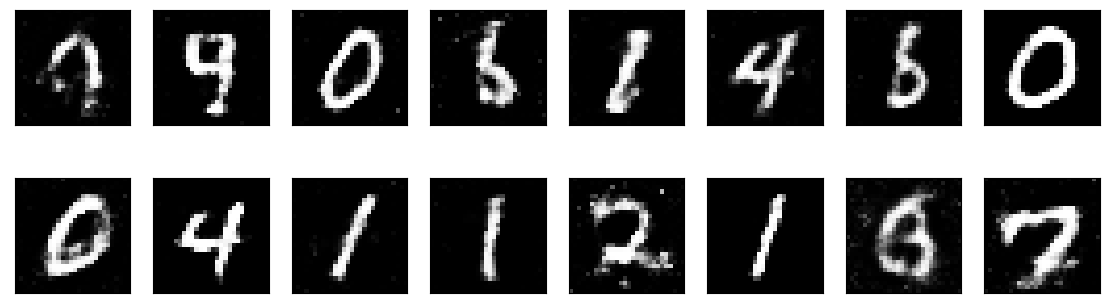

2024-03-07 07:07:21 | Epoch [32/100] | Batch 0/469 | d_loss: 1.1717 | g_loss: 0.9693
2024-03-07 07:07:22 | Epoch [32/100] | Batch 100/469 | d_loss: 1.1734 | g_loss: 1.1036
2024-03-07 07:07:23 | Epoch [32/100] | Batch 200/469 | d_loss: 1.1610 | g_loss: 0.9620
2024-03-07 07:07:25 | Epoch [32/100] | Batch 300/469 | d_loss: 1.1849 | g_loss: 0.9512
2024-03-07 07:07:26 | Epoch [32/100] | Batch 400/469 | d_loss: 1.2355 | g_loss: 1.0421


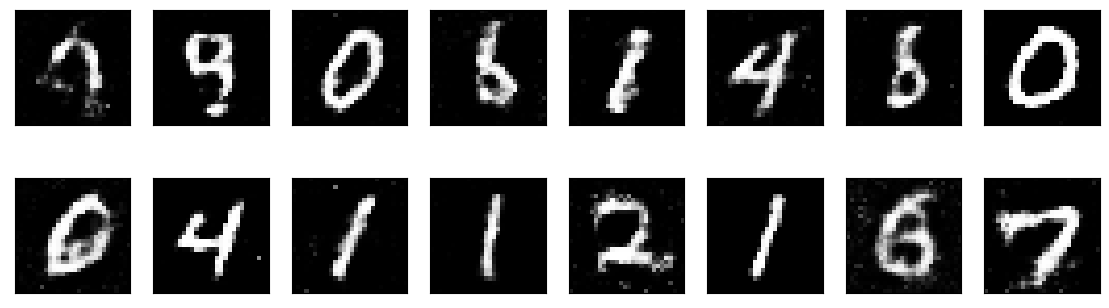

2024-03-07 07:07:28 | Epoch [33/100] | Batch 0/469 | d_loss: 1.1369 | g_loss: 1.4052
2024-03-07 07:07:29 | Epoch [33/100] | Batch 100/469 | d_loss: 1.0838 | g_loss: 1.1264
2024-03-07 07:07:30 | Epoch [33/100] | Batch 200/469 | d_loss: 1.0945 | g_loss: 1.1998
2024-03-07 07:07:31 | Epoch [33/100] | Batch 300/469 | d_loss: 1.1427 | g_loss: 1.2347
2024-03-07 07:07:32 | Epoch [33/100] | Batch 400/469 | d_loss: 1.2067 | g_loss: 1.1068


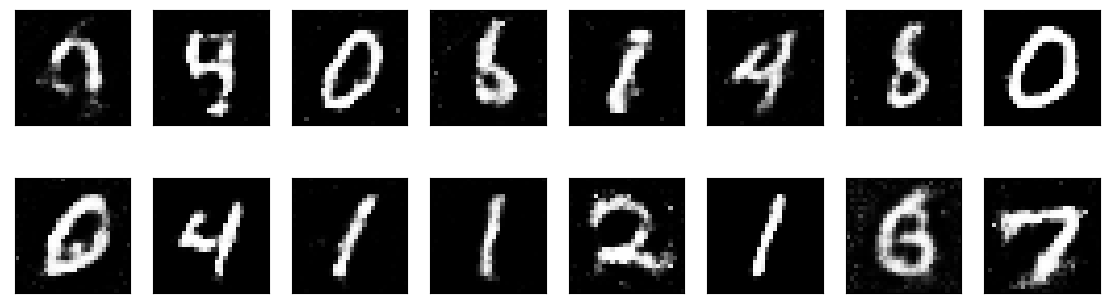

2024-03-07 07:07:34 | Epoch [34/100] | Batch 0/469 | d_loss: 1.2506 | g_loss: 0.8980
2024-03-07 07:07:35 | Epoch [34/100] | Batch 100/469 | d_loss: 1.0893 | g_loss: 1.2236
2024-03-07 07:07:37 | Epoch [34/100] | Batch 200/469 | d_loss: 1.0996 | g_loss: 1.2746
2024-03-07 07:07:38 | Epoch [34/100] | Batch 300/469 | d_loss: 1.1053 | g_loss: 1.1575
2024-03-07 07:07:39 | Epoch [34/100] | Batch 400/469 | d_loss: 1.2538 | g_loss: 1.2280


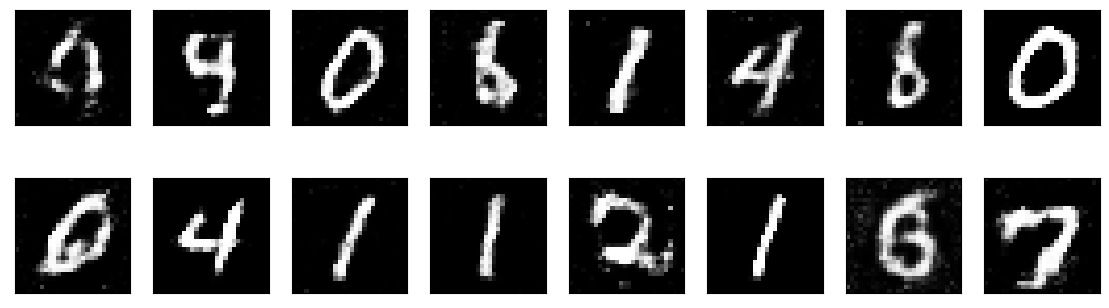

2024-03-07 07:07:41 | Epoch [35/100] | Batch 0/469 | d_loss: 1.1771 | g_loss: 0.9886
2024-03-07 07:07:43 | Epoch [35/100] | Batch 100/469 | d_loss: 1.1104 | g_loss: 1.1642
2024-03-07 07:07:44 | Epoch [35/100] | Batch 200/469 | d_loss: 1.1457 | g_loss: 1.0503
2024-03-07 07:07:45 | Epoch [35/100] | Batch 300/469 | d_loss: 1.1234 | g_loss: 1.4035
2024-03-07 07:07:46 | Epoch [35/100] | Batch 400/469 | d_loss: 1.2591 | g_loss: 1.2265


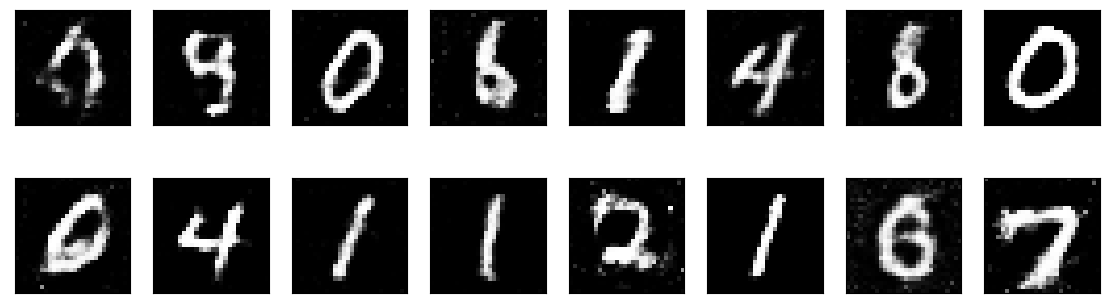

2024-03-07 07:07:48 | Epoch [36/100] | Batch 0/469 | d_loss: 1.1626 | g_loss: 1.1767
2024-03-07 07:07:49 | Epoch [36/100] | Batch 100/469 | d_loss: 1.0473 | g_loss: 1.2615
2024-03-07 07:07:50 | Epoch [36/100] | Batch 200/469 | d_loss: 1.1784 | g_loss: 1.2269
2024-03-07 07:07:52 | Epoch [36/100] | Batch 300/469 | d_loss: 1.1033 | g_loss: 1.2699
2024-03-07 07:07:53 | Epoch [36/100] | Batch 400/469 | d_loss: 1.2335 | g_loss: 1.1755


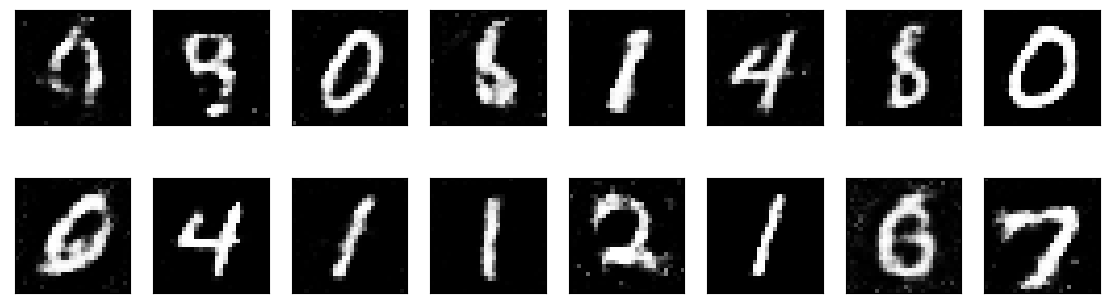

2024-03-07 07:07:55 | Epoch [37/100] | Batch 0/469 | d_loss: 1.1542 | g_loss: 1.1400
2024-03-07 07:07:56 | Epoch [37/100] | Batch 100/469 | d_loss: 1.0602 | g_loss: 1.4005
2024-03-07 07:07:57 | Epoch [37/100] | Batch 200/469 | d_loss: 1.1252 | g_loss: 1.4520
2024-03-07 07:07:59 | Epoch [37/100] | Batch 300/469 | d_loss: 1.1495 | g_loss: 1.0638
2024-03-07 07:08:00 | Epoch [37/100] | Batch 400/469 | d_loss: 1.1595 | g_loss: 1.2194


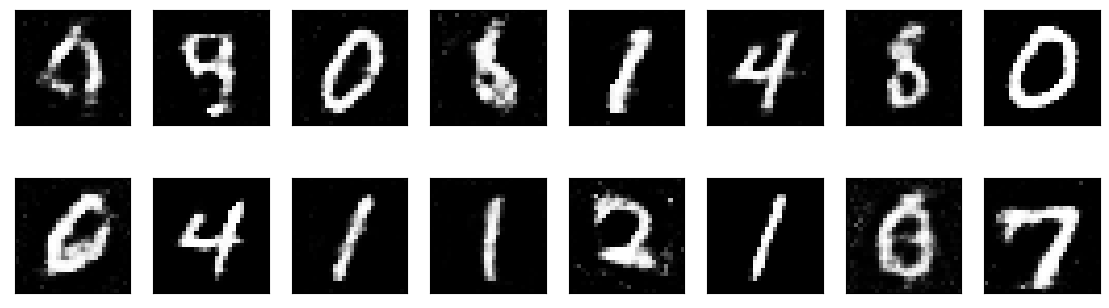

2024-03-07 07:08:02 | Epoch [38/100] | Batch 0/469 | d_loss: 1.3013 | g_loss: 0.9383
2024-03-07 07:08:04 | Epoch [38/100] | Batch 100/469 | d_loss: 1.0761 | g_loss: 1.5297
2024-03-07 07:08:05 | Epoch [38/100] | Batch 200/469 | d_loss: 1.1835 | g_loss: 1.2715
2024-03-07 07:08:06 | Epoch [38/100] | Batch 300/469 | d_loss: 1.1454 | g_loss: 1.2053
2024-03-07 07:08:08 | Epoch [38/100] | Batch 400/469 | d_loss: 1.2147 | g_loss: 1.1724


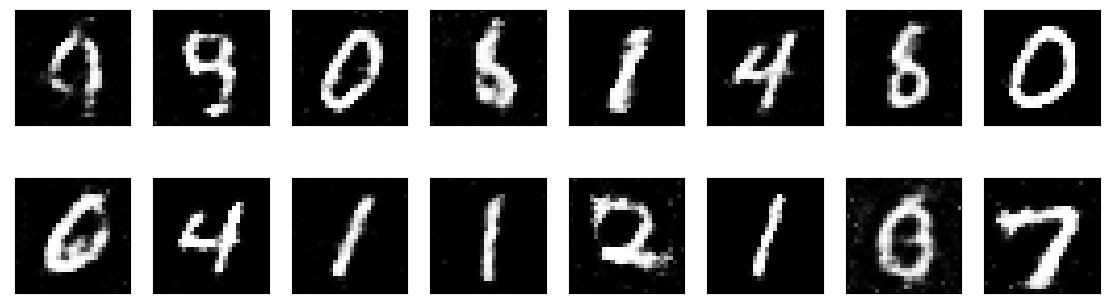

2024-03-07 07:08:10 | Epoch [39/100] | Batch 0/469 | d_loss: 1.1281 | g_loss: 1.4024
2024-03-07 07:08:11 | Epoch [39/100] | Batch 100/469 | d_loss: 1.1541 | g_loss: 1.2373
2024-03-07 07:08:13 | Epoch [39/100] | Batch 200/469 | d_loss: 1.0556 | g_loss: 1.2468
2024-03-07 07:08:14 | Epoch [39/100] | Batch 300/469 | d_loss: 1.2023 | g_loss: 1.4051
2024-03-07 07:08:16 | Epoch [39/100] | Batch 400/469 | d_loss: 1.2109 | g_loss: 1.1725


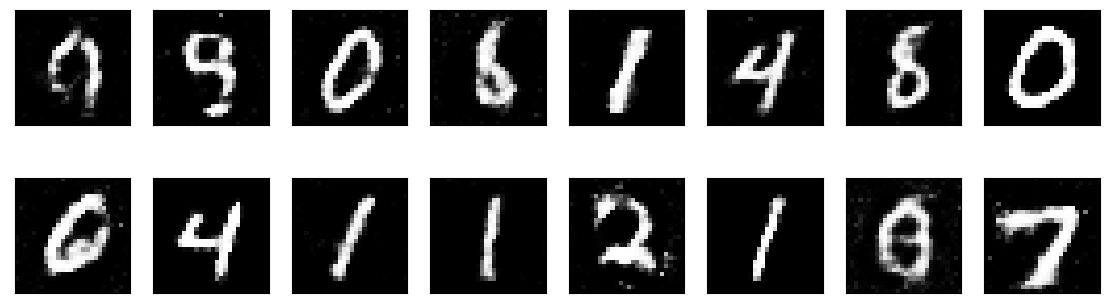

2024-03-07 07:08:18 | Epoch [40/100] | Batch 0/469 | d_loss: 1.2595 | g_loss: 0.8115
2024-03-07 07:08:19 | Epoch [40/100] | Batch 100/469 | d_loss: 1.1432 | g_loss: 1.2565
2024-03-07 07:08:21 | Epoch [40/100] | Batch 200/469 | d_loss: 1.0852 | g_loss: 1.1228
2024-03-07 07:08:22 | Epoch [40/100] | Batch 300/469 | d_loss: 1.0841 | g_loss: 1.0124
2024-03-07 07:08:23 | Epoch [40/100] | Batch 400/469 | d_loss: 1.2807 | g_loss: 1.4493


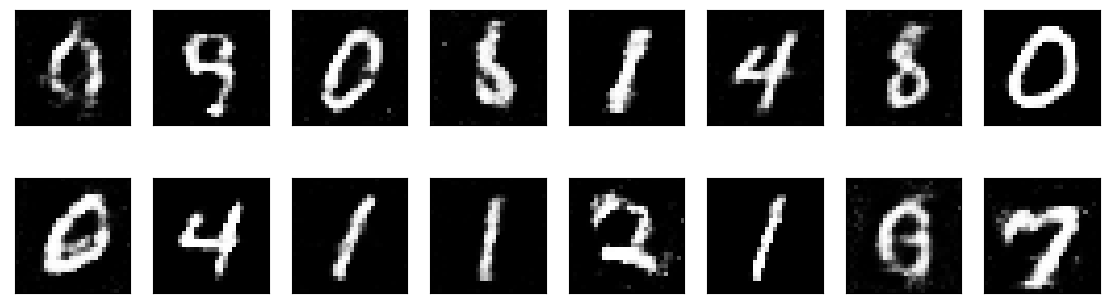

2024-03-07 07:08:25 | Epoch [41/100] | Batch 0/469 | d_loss: 1.1418 | g_loss: 1.2907
2024-03-07 07:08:27 | Epoch [41/100] | Batch 100/469 | d_loss: 1.1115 | g_loss: 1.2559
2024-03-07 07:08:28 | Epoch [41/100] | Batch 200/469 | d_loss: 1.0806 | g_loss: 1.3859
2024-03-07 07:08:29 | Epoch [41/100] | Batch 300/469 | d_loss: 1.1022 | g_loss: 1.3497
2024-03-07 07:08:30 | Epoch [41/100] | Batch 400/469 | d_loss: 1.2061 | g_loss: 1.2763


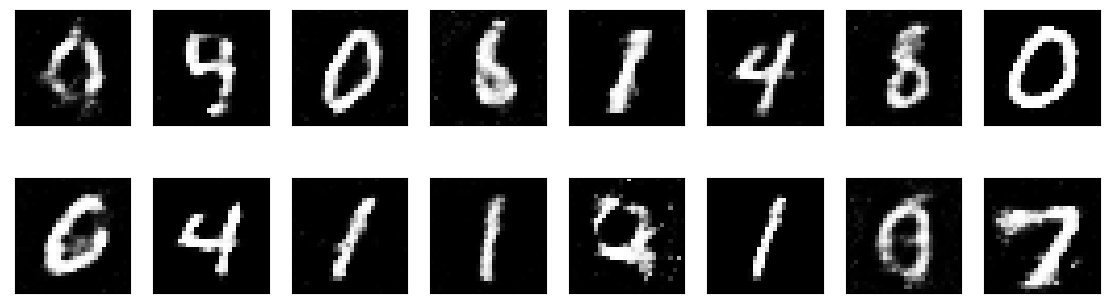

2024-03-07 07:08:32 | Epoch [42/100] | Batch 0/469 | d_loss: 1.3079 | g_loss: 1.0495
2024-03-07 07:08:33 | Epoch [42/100] | Batch 100/469 | d_loss: 1.2105 | g_loss: 1.4530
2024-03-07 07:08:35 | Epoch [42/100] | Batch 200/469 | d_loss: 1.0987 | g_loss: 1.4401
2024-03-07 07:08:36 | Epoch [42/100] | Batch 300/469 | d_loss: 1.1922 | g_loss: 1.3349
2024-03-07 07:08:37 | Epoch [42/100] | Batch 400/469 | d_loss: 1.1054 | g_loss: 1.2409


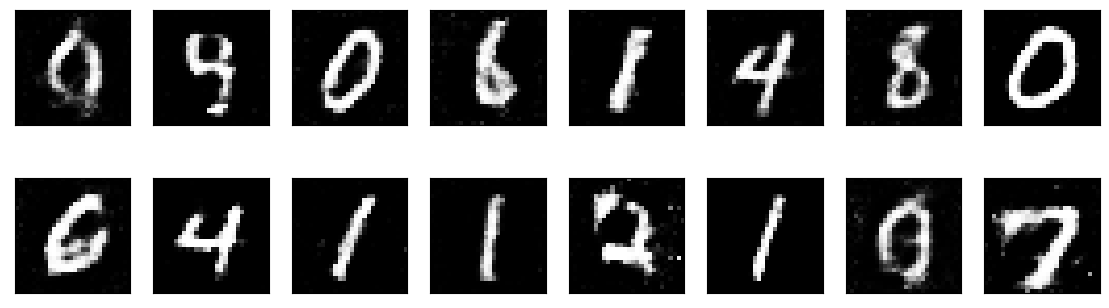

2024-03-07 07:08:39 | Epoch [43/100] | Batch 0/469 | d_loss: 1.1240 | g_loss: 1.2055
2024-03-07 07:08:40 | Epoch [43/100] | Batch 100/469 | d_loss: 1.1093 | g_loss: 1.1846
2024-03-07 07:08:42 | Epoch [43/100] | Batch 200/469 | d_loss: 1.1350 | g_loss: 1.3711
2024-03-07 07:08:43 | Epoch [43/100] | Batch 300/469 | d_loss: 1.1582 | g_loss: 1.1457
2024-03-07 07:08:44 | Epoch [43/100] | Batch 400/469 | d_loss: 1.1519 | g_loss: 1.0246


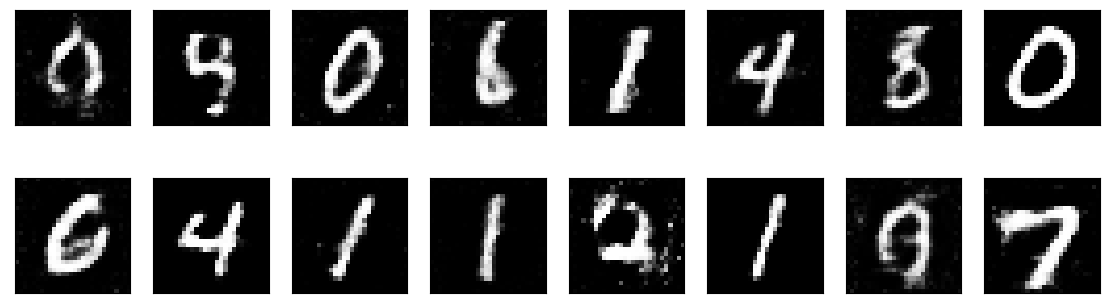

2024-03-07 07:08:46 | Epoch [44/100] | Batch 0/469 | d_loss: 1.1263 | g_loss: 1.0185
2024-03-07 07:08:48 | Epoch [44/100] | Batch 100/469 | d_loss: 1.0883 | g_loss: 1.2130
2024-03-07 07:08:49 | Epoch [44/100] | Batch 200/469 | d_loss: 1.0607 | g_loss: 1.5448
2024-03-07 07:08:51 | Epoch [44/100] | Batch 300/469 | d_loss: 1.1288 | g_loss: 1.0925
2024-03-07 07:08:52 | Epoch [44/100] | Batch 400/469 | d_loss: 1.1287 | g_loss: 1.3978


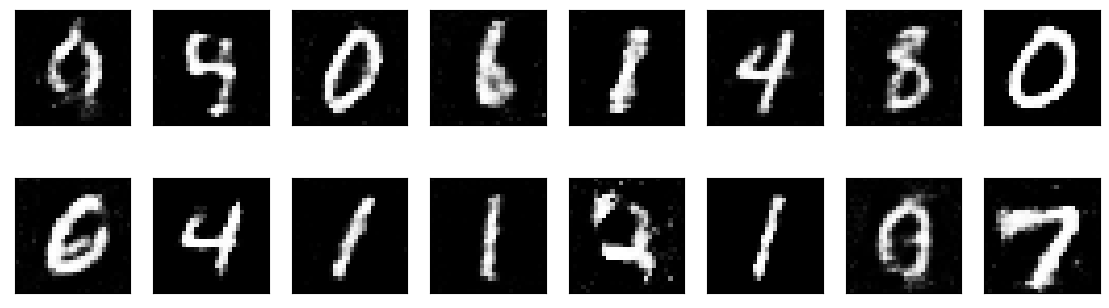

2024-03-07 07:08:54 | Epoch [45/100] | Batch 0/469 | d_loss: 1.1109 | g_loss: 1.1341
2024-03-07 07:08:55 | Epoch [45/100] | Batch 100/469 | d_loss: 1.1121 | g_loss: 1.4411
2024-03-07 07:08:57 | Epoch [45/100] | Batch 200/469 | d_loss: 1.0784 | g_loss: 1.3072
2024-03-07 07:08:58 | Epoch [45/100] | Batch 300/469 | d_loss: 1.1225 | g_loss: 1.3048
2024-03-07 07:09:00 | Epoch [45/100] | Batch 400/469 | d_loss: 1.2435 | g_loss: 1.0440


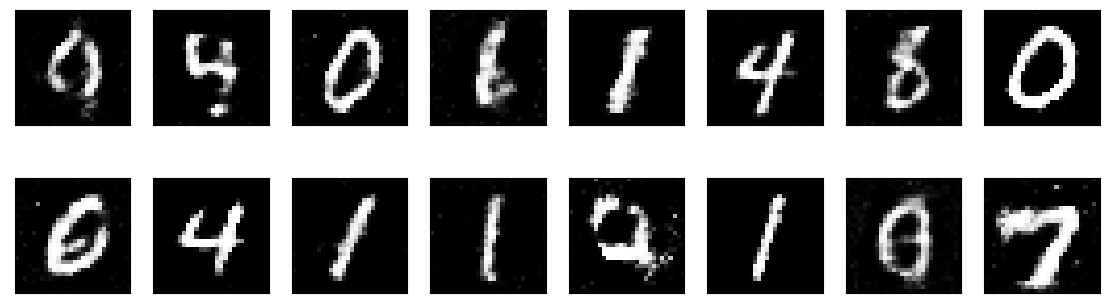

2024-03-07 07:09:01 | Epoch [46/100] | Batch 0/469 | d_loss: 1.1135 | g_loss: 1.4977
2024-03-07 07:09:03 | Epoch [46/100] | Batch 100/469 | d_loss: 1.0686 | g_loss: 1.2766
2024-03-07 07:09:04 | Epoch [46/100] | Batch 200/469 | d_loss: 1.1086 | g_loss: 1.6065
2024-03-07 07:09:05 | Epoch [46/100] | Batch 300/469 | d_loss: 1.1351 | g_loss: 1.3573
2024-03-07 07:09:07 | Epoch [46/100] | Batch 400/469 | d_loss: 1.1905 | g_loss: 1.1388


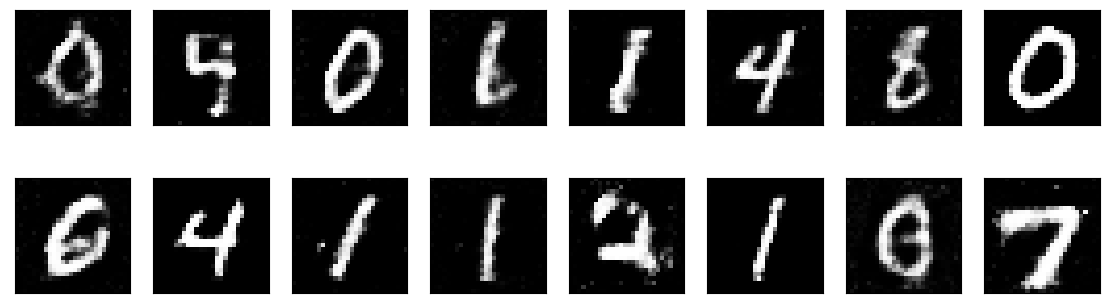

2024-03-07 07:09:09 | Epoch [47/100] | Batch 0/469 | d_loss: 1.1322 | g_loss: 1.1920
2024-03-07 07:09:10 | Epoch [47/100] | Batch 100/469 | d_loss: 1.1249 | g_loss: 1.4364
2024-03-07 07:09:12 | Epoch [47/100] | Batch 200/469 | d_loss: 1.0169 | g_loss: 1.3062
2024-03-07 07:09:13 | Epoch [47/100] | Batch 300/469 | d_loss: 1.0468 | g_loss: 1.2762
2024-03-07 07:09:15 | Epoch [47/100] | Batch 400/469 | d_loss: 1.1456 | g_loss: 1.2003


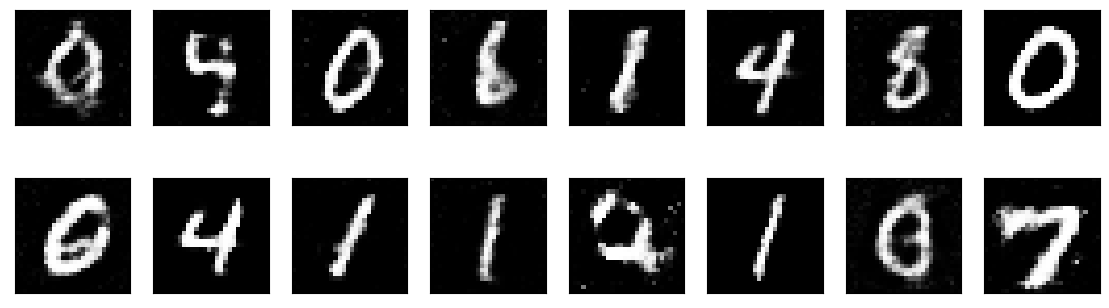

2024-03-07 07:09:17 | Epoch [48/100] | Batch 0/469 | d_loss: 1.1122 | g_loss: 1.3475
2024-03-07 07:09:18 | Epoch [48/100] | Batch 100/469 | d_loss: 1.1098 | g_loss: 1.3507
2024-03-07 07:09:19 | Epoch [48/100] | Batch 200/469 | d_loss: 1.0889 | g_loss: 1.3820
2024-03-07 07:09:21 | Epoch [48/100] | Batch 300/469 | d_loss: 1.1122 | g_loss: 1.2716
2024-03-07 07:09:22 | Epoch [48/100] | Batch 400/469 | d_loss: 1.1244 | g_loss: 1.1192


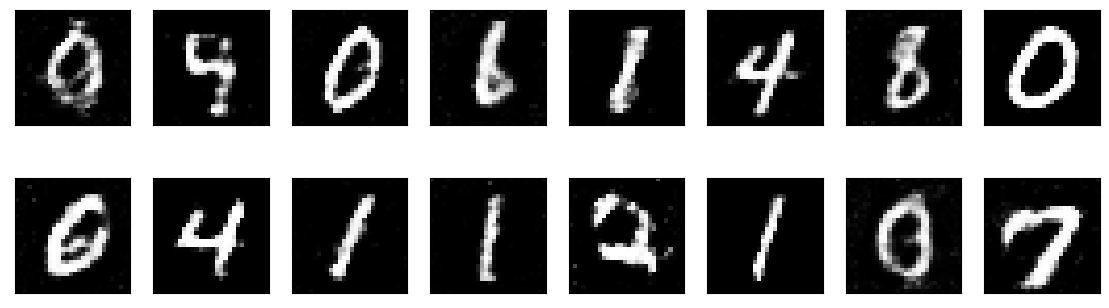

2024-03-07 07:09:24 | Epoch [49/100] | Batch 0/469 | d_loss: 1.2465 | g_loss: 0.8844
2024-03-07 07:09:25 | Epoch [49/100] | Batch 100/469 | d_loss: 1.2143 | g_loss: 1.6347
2024-03-07 07:09:26 | Epoch [49/100] | Batch 200/469 | d_loss: 1.0998 | g_loss: 1.5296
2024-03-07 07:09:28 | Epoch [49/100] | Batch 300/469 | d_loss: 1.0895 | g_loss: 0.9820
2024-03-07 07:09:29 | Epoch [49/100] | Batch 400/469 | d_loss: 1.1715 | g_loss: 1.0628


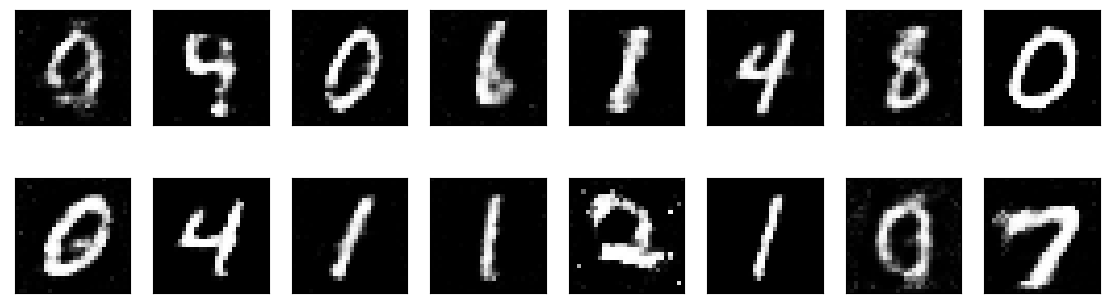

2024-03-07 07:09:31 | Epoch [50/100] | Batch 0/469 | d_loss: 1.1236 | g_loss: 1.2497
2024-03-07 07:09:32 | Epoch [50/100] | Batch 100/469 | d_loss: 1.1406 | g_loss: 1.6705
2024-03-07 07:09:33 | Epoch [50/100] | Batch 200/469 | d_loss: 1.1142 | g_loss: 1.4075
2024-03-07 07:09:34 | Epoch [50/100] | Batch 300/469 | d_loss: 1.1253 | g_loss: 1.3652
2024-03-07 07:09:35 | Epoch [50/100] | Batch 400/469 | d_loss: 1.1878 | g_loss: 1.2401


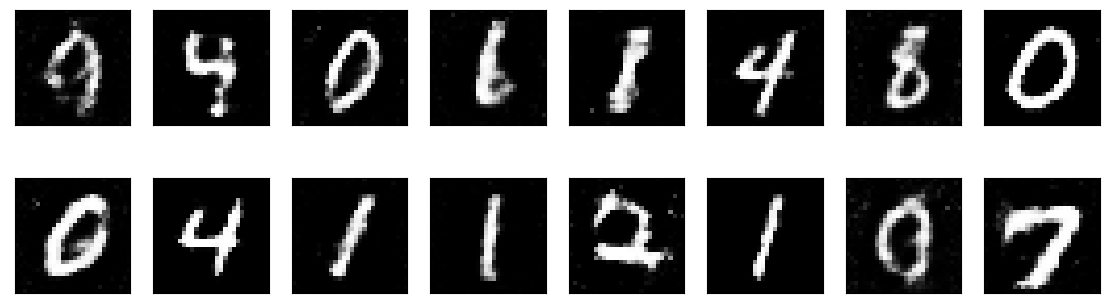

2024-03-07 07:09:37 | Epoch [51/100] | Batch 0/469 | d_loss: 1.0961 | g_loss: 1.6085
2024-03-07 07:09:39 | Epoch [51/100] | Batch 100/469 | d_loss: 1.0842 | g_loss: 1.3983
2024-03-07 07:09:40 | Epoch [51/100] | Batch 200/469 | d_loss: 1.0481 | g_loss: 1.3302
2024-03-07 07:09:42 | Epoch [51/100] | Batch 300/469 | d_loss: 1.0822 | g_loss: 1.3807
2024-03-07 07:09:43 | Epoch [51/100] | Batch 400/469 | d_loss: 1.0800 | g_loss: 1.4217


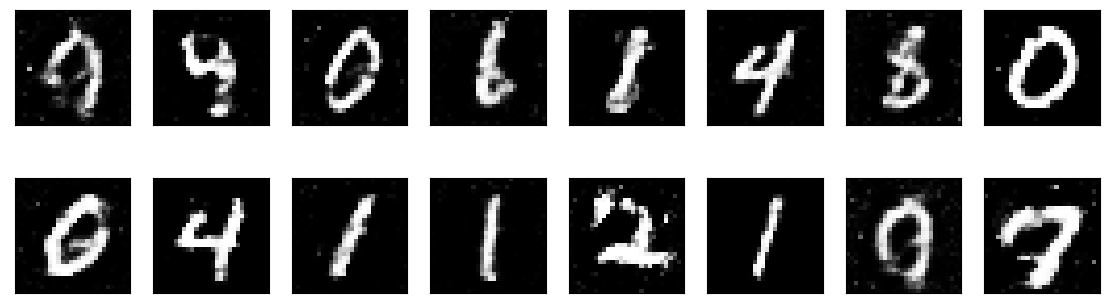

2024-03-07 07:09:45 | Epoch [52/100] | Batch 0/469 | d_loss: 1.1413 | g_loss: 1.2759
2024-03-07 07:09:46 | Epoch [52/100] | Batch 100/469 | d_loss: 1.1475 | g_loss: 1.3405
2024-03-07 07:09:48 | Epoch [52/100] | Batch 200/469 | d_loss: 1.1879 | g_loss: 1.3884
2024-03-07 07:09:49 | Epoch [52/100] | Batch 300/469 | d_loss: 1.0659 | g_loss: 1.4154
2024-03-07 07:09:51 | Epoch [52/100] | Batch 400/469 | d_loss: 1.0552 | g_loss: 1.4511


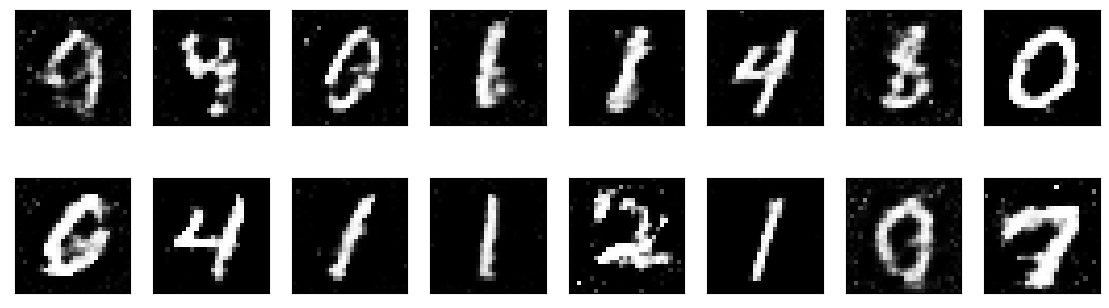

2024-03-07 07:09:53 | Epoch [53/100] | Batch 0/469 | d_loss: 1.0258 | g_loss: 1.4193
2024-03-07 07:09:54 | Epoch [53/100] | Batch 100/469 | d_loss: 1.0834 | g_loss: 1.3942
2024-03-07 07:09:55 | Epoch [53/100] | Batch 200/469 | d_loss: 1.0214 | g_loss: 1.3733
2024-03-07 07:09:56 | Epoch [53/100] | Batch 300/469 | d_loss: 1.0780 | g_loss: 1.3774
2024-03-07 07:09:57 | Epoch [53/100] | Batch 400/469 | d_loss: 1.0372 | g_loss: 1.4895


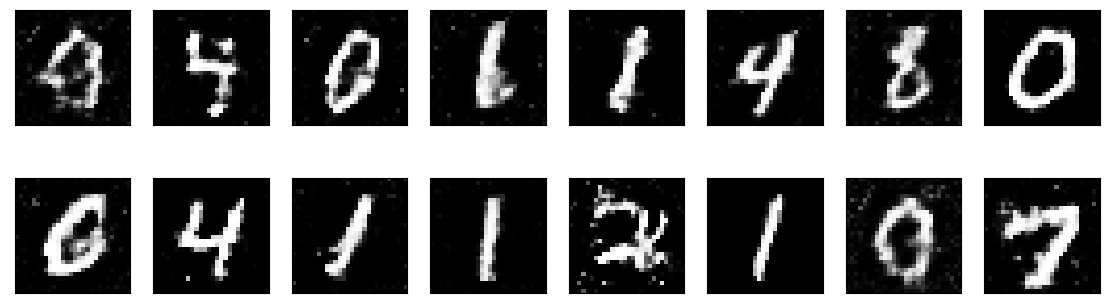

2024-03-07 07:09:59 | Epoch [54/100] | Batch 0/469 | d_loss: 1.0402 | g_loss: 1.3816
2024-03-07 07:10:00 | Epoch [54/100] | Batch 100/469 | d_loss: 1.0081 | g_loss: 1.4845
2024-03-07 07:10:01 | Epoch [54/100] | Batch 200/469 | d_loss: 1.0647 | g_loss: 1.4517
2024-03-07 07:10:03 | Epoch [54/100] | Batch 300/469 | d_loss: 1.0684 | g_loss: 1.3311
2024-03-07 07:10:04 | Epoch [54/100] | Batch 400/469 | d_loss: 1.0637 | g_loss: 1.4766


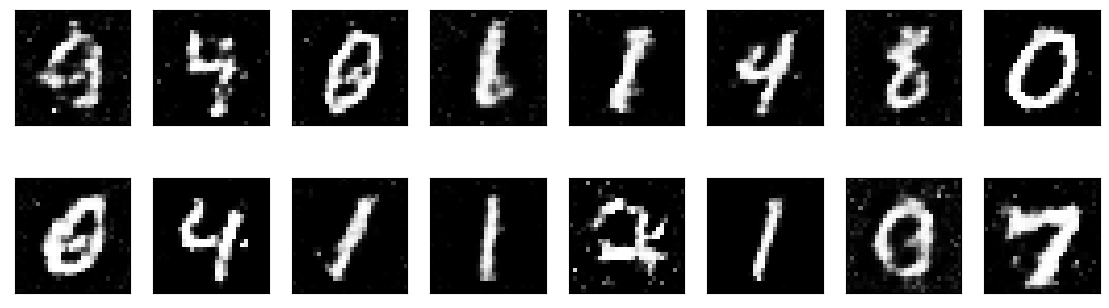

2024-03-07 07:10:06 | Epoch [55/100] | Batch 0/469 | d_loss: 1.0226 | g_loss: 1.3635
2024-03-07 07:10:07 | Epoch [55/100] | Batch 100/469 | d_loss: 0.9960 | g_loss: 1.4642
2024-03-07 07:10:08 | Epoch [55/100] | Batch 200/469 | d_loss: 1.0826 | g_loss: 1.3032
2024-03-07 07:10:09 | Epoch [55/100] | Batch 300/469 | d_loss: 1.0176 | g_loss: 1.2248
2024-03-07 07:10:10 | Epoch [55/100] | Batch 400/469 | d_loss: 1.0979 | g_loss: 1.4995


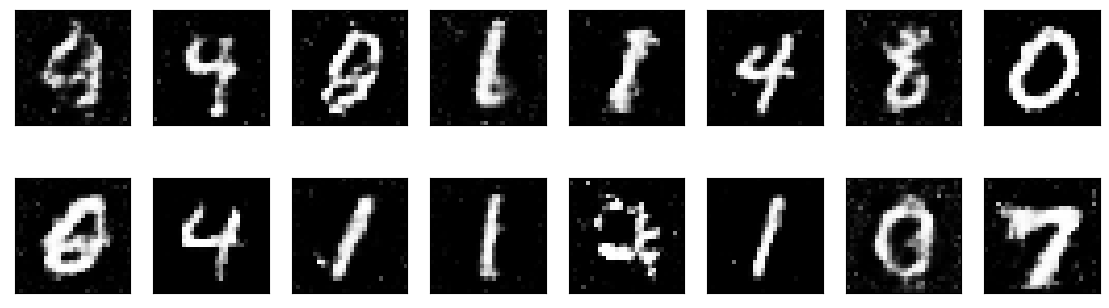

2024-03-07 07:10:12 | Epoch [56/100] | Batch 0/469 | d_loss: 0.9898 | g_loss: 1.4276
2024-03-07 07:10:13 | Epoch [56/100] | Batch 100/469 | d_loss: 1.0669 | g_loss: 1.5096
2024-03-07 07:10:14 | Epoch [56/100] | Batch 200/469 | d_loss: 1.1014 | g_loss: 1.3570
2024-03-07 07:10:15 | Epoch [56/100] | Batch 300/469 | d_loss: 1.0353 | g_loss: 1.4545
2024-03-07 07:10:16 | Epoch [56/100] | Batch 400/469 | d_loss: 1.1071 | g_loss: 1.3716


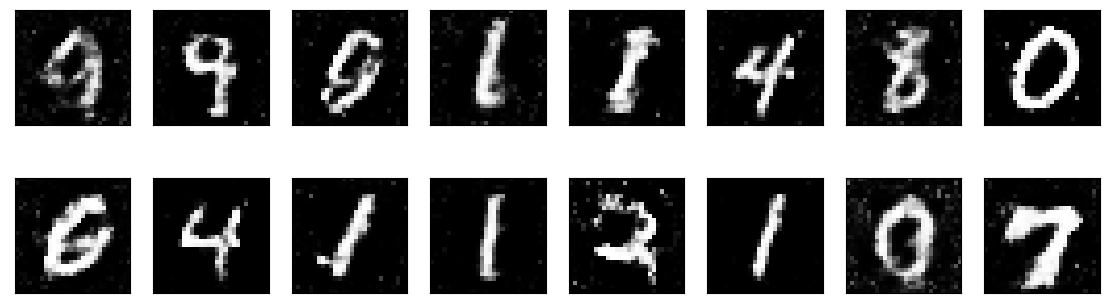

2024-03-07 07:10:18 | Epoch [57/100] | Batch 0/469 | d_loss: 1.0616 | g_loss: 1.5787
2024-03-07 07:10:19 | Epoch [57/100] | Batch 100/469 | d_loss: 1.0619 | g_loss: 1.6693
2024-03-07 07:10:20 | Epoch [57/100] | Batch 200/469 | d_loss: 1.1570 | g_loss: 1.3805
2024-03-07 07:10:22 | Epoch [57/100] | Batch 300/469 | d_loss: 1.1187 | g_loss: 1.4689
2024-03-07 07:10:23 | Epoch [57/100] | Batch 400/469 | d_loss: 1.1057 | g_loss: 1.4896


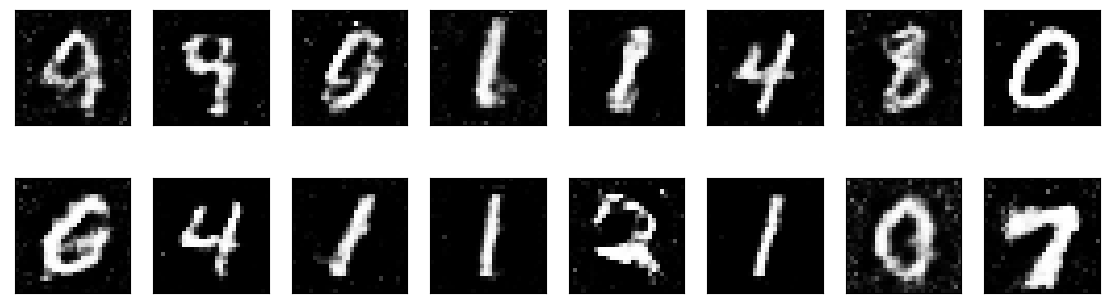

2024-03-07 07:10:25 | Epoch [58/100] | Batch 0/469 | d_loss: 1.0976 | g_loss: 1.4772
2024-03-07 07:10:26 | Epoch [58/100] | Batch 100/469 | d_loss: 1.0168 | g_loss: 1.3602
2024-03-07 07:10:27 | Epoch [58/100] | Batch 200/469 | d_loss: 1.0066 | g_loss: 1.3815
2024-03-07 07:10:29 | Epoch [58/100] | Batch 300/469 | d_loss: 1.0484 | g_loss: 1.3073
2024-03-07 07:10:30 | Epoch [58/100] | Batch 400/469 | d_loss: 1.1699 | g_loss: 1.4817


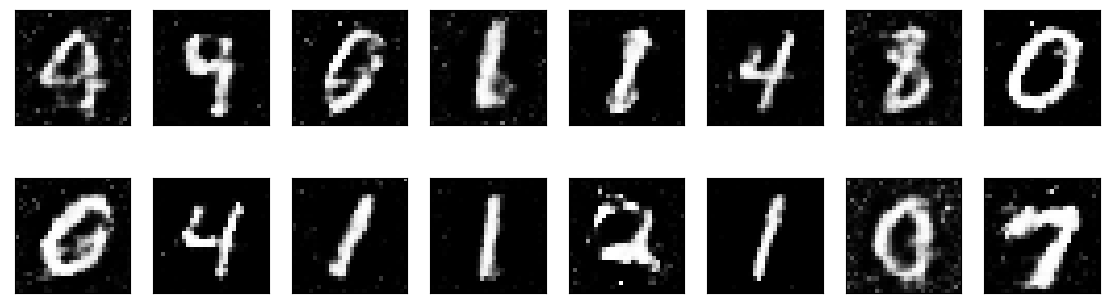

2024-03-07 07:10:31 | Epoch [59/100] | Batch 0/469 | d_loss: 1.1079 | g_loss: 1.4814
2024-03-07 07:10:33 | Epoch [59/100] | Batch 100/469 | d_loss: 1.0570 | g_loss: 1.3706
2024-03-07 07:10:34 | Epoch [59/100] | Batch 200/469 | d_loss: 1.0983 | g_loss: 1.3735
2024-03-07 07:10:35 | Epoch [59/100] | Batch 300/469 | d_loss: 1.0450 | g_loss: 1.3907
2024-03-07 07:10:37 | Epoch [59/100] | Batch 400/469 | d_loss: 1.1226 | g_loss: 1.3036


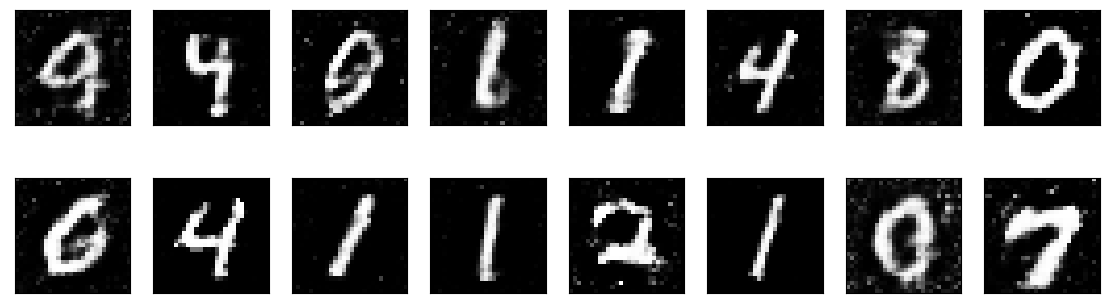

2024-03-07 07:10:39 | Epoch [60/100] | Batch 0/469 | d_loss: 1.1300 | g_loss: 1.5404
2024-03-07 07:10:40 | Epoch [60/100] | Batch 100/469 | d_loss: 1.0936 | g_loss: 1.4441
2024-03-07 07:10:42 | Epoch [60/100] | Batch 200/469 | d_loss: 1.0649 | g_loss: 1.3817
2024-03-07 07:10:44 | Epoch [60/100] | Batch 300/469 | d_loss: 1.1507 | g_loss: 1.4082
2024-03-07 07:10:45 | Epoch [60/100] | Batch 400/469 | d_loss: 1.0771 | g_loss: 1.3948


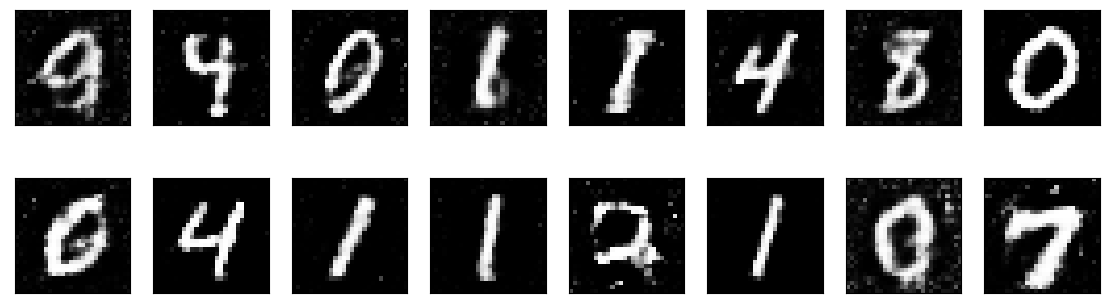

2024-03-07 07:10:47 | Epoch [61/100] | Batch 0/469 | d_loss: 1.0832 | g_loss: 1.3669
2024-03-07 07:10:48 | Epoch [61/100] | Batch 100/469 | d_loss: 1.0153 | g_loss: 1.4027
2024-03-07 07:10:49 | Epoch [61/100] | Batch 200/469 | d_loss: 1.1418 | g_loss: 1.3884
2024-03-07 07:10:51 | Epoch [61/100] | Batch 300/469 | d_loss: 1.1537 | g_loss: 1.2630
2024-03-07 07:10:52 | Epoch [61/100] | Batch 400/469 | d_loss: 1.1788 | g_loss: 1.4423


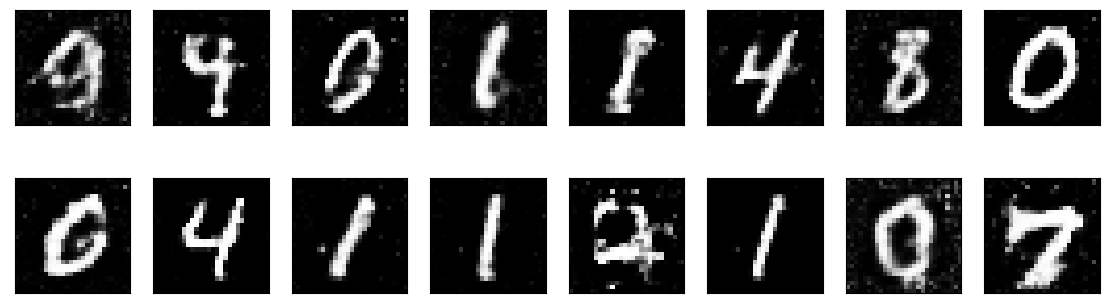

2024-03-07 07:10:54 | Epoch [62/100] | Batch 0/469 | d_loss: 1.1047 | g_loss: 1.4186
2024-03-07 07:10:56 | Epoch [62/100] | Batch 100/469 | d_loss: 1.0726 | g_loss: 1.2999
2024-03-07 07:10:57 | Epoch [62/100] | Batch 200/469 | d_loss: 1.0884 | g_loss: 1.2926
2024-03-07 07:10:59 | Epoch [62/100] | Batch 300/469 | d_loss: 1.0760 | g_loss: 1.3331
2024-03-07 07:11:00 | Epoch [62/100] | Batch 400/469 | d_loss: 1.0539 | g_loss: 1.3798


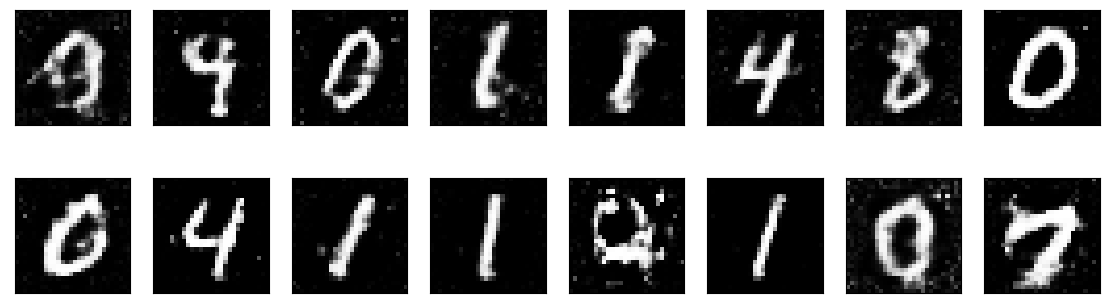

2024-03-07 07:11:03 | Epoch [63/100] | Batch 0/469 | d_loss: 1.0554 | g_loss: 1.4778
2024-03-07 07:11:04 | Epoch [63/100] | Batch 100/469 | d_loss: 1.1189 | g_loss: 1.3285
2024-03-07 07:11:06 | Epoch [63/100] | Batch 200/469 | d_loss: 1.0766 | g_loss: 1.3561
2024-03-07 07:11:07 | Epoch [63/100] | Batch 300/469 | d_loss: 1.1449 | g_loss: 1.2600
2024-03-07 07:11:08 | Epoch [63/100] | Batch 400/469 | d_loss: 1.1565 | g_loss: 1.3670


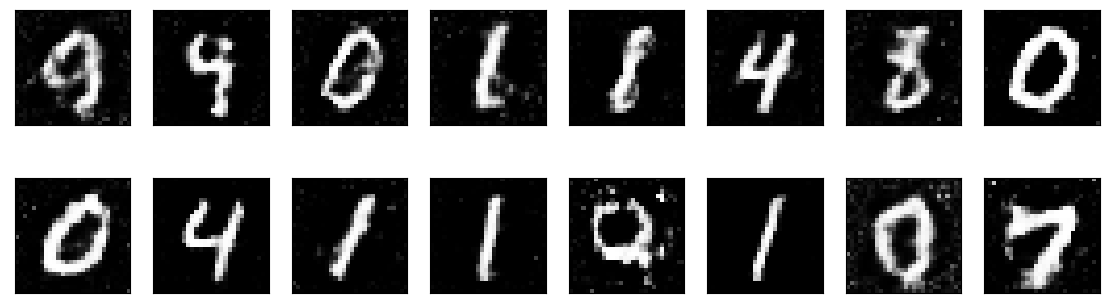

2024-03-07 07:11:10 | Epoch [64/100] | Batch 0/469 | d_loss: 1.0383 | g_loss: 1.4453
2024-03-07 07:11:11 | Epoch [64/100] | Batch 100/469 | d_loss: 1.1020 | g_loss: 1.2835
2024-03-07 07:11:12 | Epoch [64/100] | Batch 200/469 | d_loss: 1.1126 | g_loss: 1.3588
2024-03-07 07:11:13 | Epoch [64/100] | Batch 300/469 | d_loss: 1.0459 | g_loss: 1.4567
2024-03-07 07:11:15 | Epoch [64/100] | Batch 400/469 | d_loss: 1.1613 | g_loss: 1.4167


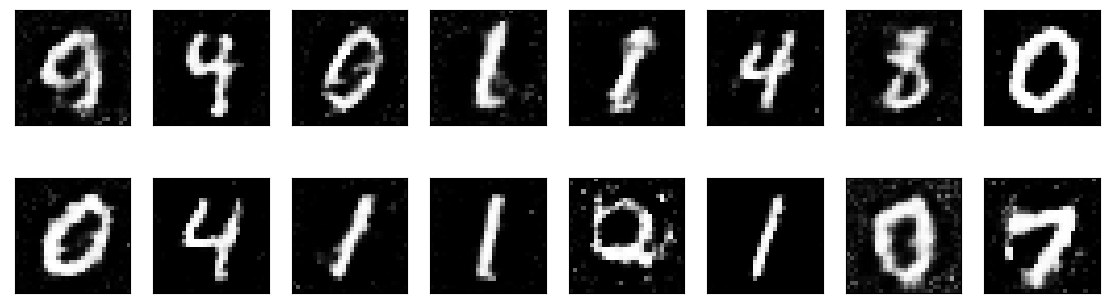

2024-03-07 07:11:16 | Epoch [65/100] | Batch 0/469 | d_loss: 1.0789 | g_loss: 1.3538
2024-03-07 07:11:18 | Epoch [65/100] | Batch 100/469 | d_loss: 1.1026 | g_loss: 1.4377
2024-03-07 07:11:19 | Epoch [65/100] | Batch 200/469 | d_loss: 1.0914 | g_loss: 1.4134
2024-03-07 07:11:20 | Epoch [65/100] | Batch 300/469 | d_loss: 1.0560 | g_loss: 1.4439
2024-03-07 07:11:21 | Epoch [65/100] | Batch 400/469 | d_loss: 1.1101 | g_loss: 1.3327


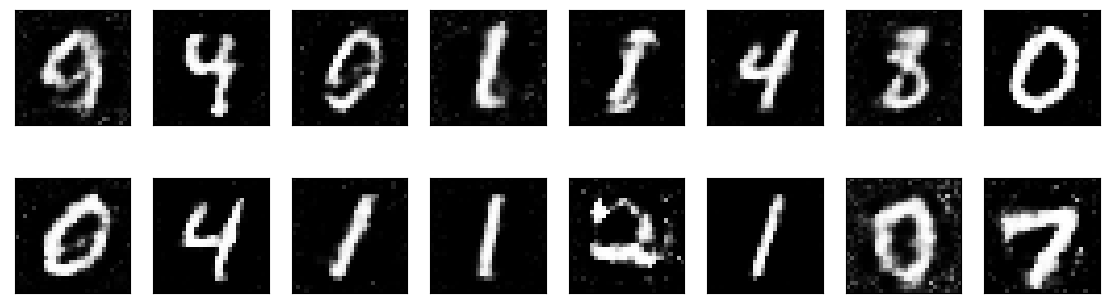

2024-03-07 07:11:23 | Epoch [66/100] | Batch 0/469 | d_loss: 1.0460 | g_loss: 1.3570
2024-03-07 07:11:24 | Epoch [66/100] | Batch 100/469 | d_loss: 1.0613 | g_loss: 1.4109
2024-03-07 07:11:25 | Epoch [66/100] | Batch 200/469 | d_loss: 1.1714 | g_loss: 1.2604
2024-03-07 07:11:26 | Epoch [66/100] | Batch 300/469 | d_loss: 1.1781 | g_loss: 1.4069
2024-03-07 07:11:27 | Epoch [66/100] | Batch 400/469 | d_loss: 1.1125 | g_loss: 1.2666


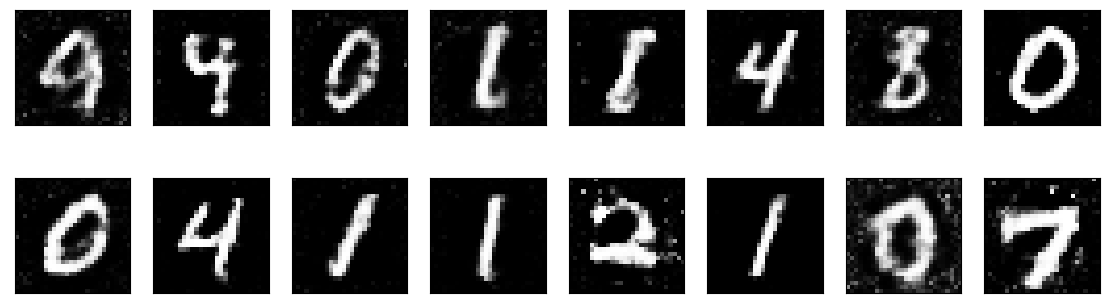

2024-03-07 07:11:29 | Epoch [67/100] | Batch 0/469 | d_loss: 1.1072 | g_loss: 1.3990
2024-03-07 07:11:30 | Epoch [67/100] | Batch 100/469 | d_loss: 1.0701 | g_loss: 1.3309
2024-03-07 07:11:31 | Epoch [67/100] | Batch 200/469 | d_loss: 1.1470 | g_loss: 1.3970
2024-03-07 07:11:33 | Epoch [67/100] | Batch 300/469 | d_loss: 1.0888 | g_loss: 1.3038
2024-03-07 07:11:34 | Epoch [67/100] | Batch 400/469 | d_loss: 1.1678 | g_loss: 1.2154


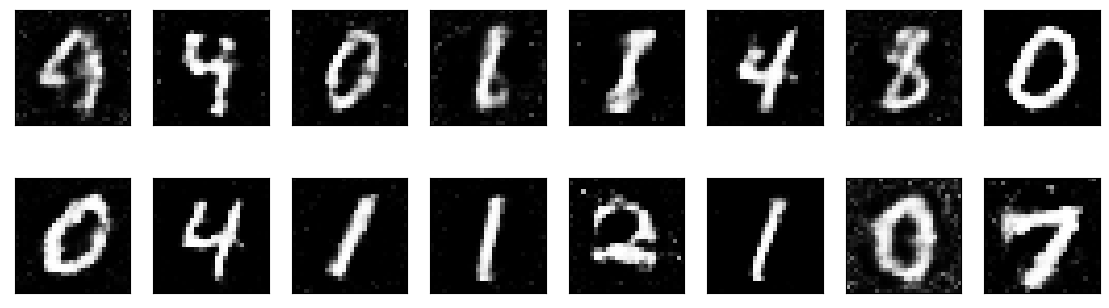

2024-03-07 07:11:35 | Epoch [68/100] | Batch 0/469 | d_loss: 1.0947 | g_loss: 1.3404
2024-03-07 07:11:37 | Epoch [68/100] | Batch 100/469 | d_loss: 1.1417 | g_loss: 1.4155
2024-03-07 07:11:38 | Epoch [68/100] | Batch 200/469 | d_loss: 1.1350 | g_loss: 1.3630
2024-03-07 07:11:39 | Epoch [68/100] | Batch 300/469 | d_loss: 1.0775 | g_loss: 1.2598
2024-03-07 07:11:40 | Epoch [68/100] | Batch 400/469 | d_loss: 1.2503 | g_loss: 1.3357


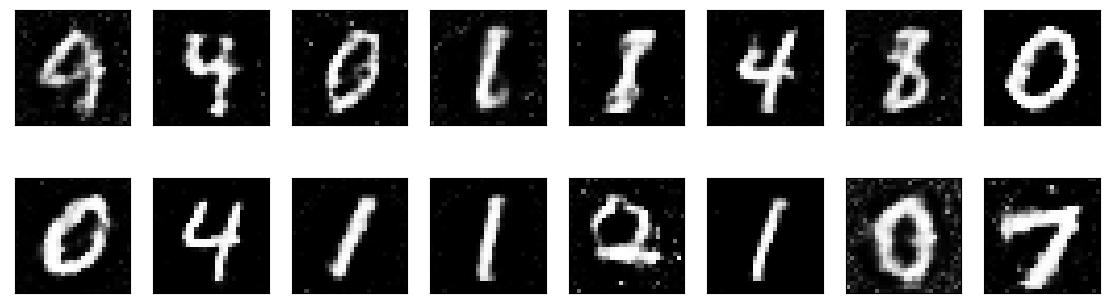

2024-03-07 07:11:42 | Epoch [69/100] | Batch 0/469 | d_loss: 1.0663 | g_loss: 1.5009
2024-03-07 07:11:43 | Epoch [69/100] | Batch 100/469 | d_loss: 1.0781 | g_loss: 1.3528
2024-03-07 07:11:45 | Epoch [69/100] | Batch 200/469 | d_loss: 1.1712 | g_loss: 1.3049
2024-03-07 07:11:46 | Epoch [69/100] | Batch 300/469 | d_loss: 1.0710 | g_loss: 1.3660
2024-03-07 07:11:47 | Epoch [69/100] | Batch 400/469 | d_loss: 1.1281 | g_loss: 1.3137


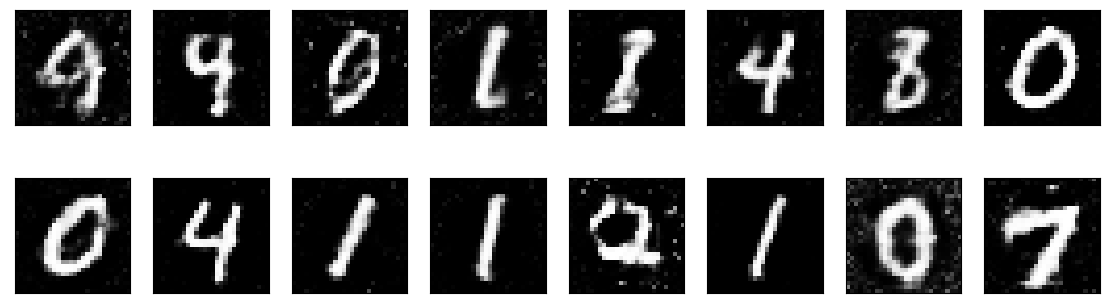

2024-03-07 07:11:49 | Epoch [70/100] | Batch 0/469 | d_loss: 1.0759 | g_loss: 1.3027
2024-03-07 07:11:50 | Epoch [70/100] | Batch 100/469 | d_loss: 1.0336 | g_loss: 1.3808
2024-03-07 07:11:51 | Epoch [70/100] | Batch 200/469 | d_loss: 1.1420 | g_loss: 1.3941
2024-03-07 07:11:52 | Epoch [70/100] | Batch 300/469 | d_loss: 1.1934 | g_loss: 1.2947
2024-03-07 07:11:54 | Epoch [70/100] | Batch 400/469 | d_loss: 1.0351 | g_loss: 1.2684


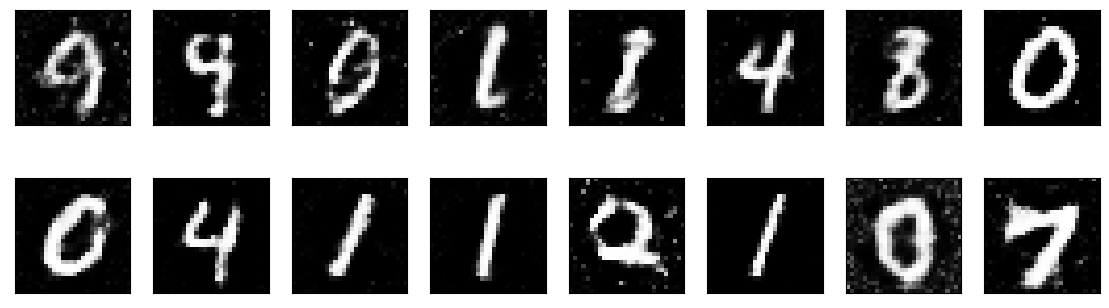

2024-03-07 07:11:55 | Epoch [71/100] | Batch 0/469 | d_loss: 1.0791 | g_loss: 1.3123
2024-03-07 07:11:57 | Epoch [71/100] | Batch 100/469 | d_loss: 1.1852 | g_loss: 1.3419
2024-03-07 07:11:58 | Epoch [71/100] | Batch 200/469 | d_loss: 1.0534 | g_loss: 1.2533
2024-03-07 07:12:00 | Epoch [71/100] | Batch 300/469 | d_loss: 1.1463 | g_loss: 1.3192
2024-03-07 07:12:01 | Epoch [71/100] | Batch 400/469 | d_loss: 1.1399 | g_loss: 1.3835


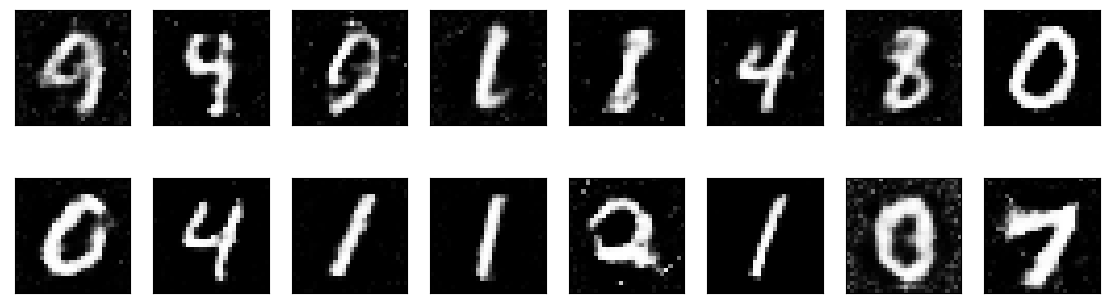

2024-03-07 07:12:03 | Epoch [72/100] | Batch 0/469 | d_loss: 1.1234 | g_loss: 1.4798
2024-03-07 07:12:04 | Epoch [72/100] | Batch 100/469 | d_loss: 1.0780 | g_loss: 1.3842
2024-03-07 07:12:06 | Epoch [72/100] | Batch 200/469 | d_loss: 1.0394 | g_loss: 1.3318
2024-03-07 07:12:07 | Epoch [72/100] | Batch 300/469 | d_loss: 1.1740 | g_loss: 1.2386
2024-03-07 07:12:09 | Epoch [72/100] | Batch 400/469 | d_loss: 1.1866 | g_loss: 1.2567


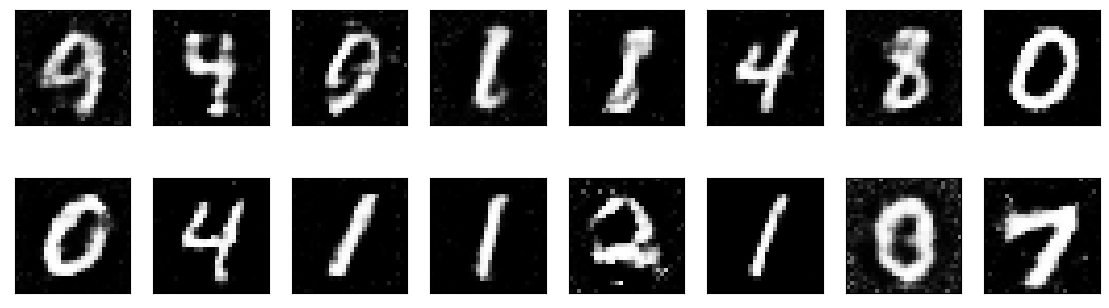

2024-03-07 07:12:11 | Epoch [73/100] | Batch 0/469 | d_loss: 1.0412 | g_loss: 1.2982
2024-03-07 07:12:12 | Epoch [73/100] | Batch 100/469 | d_loss: 1.0376 | g_loss: 1.3938
2024-03-07 07:12:13 | Epoch [73/100] | Batch 200/469 | d_loss: 1.1349 | g_loss: 1.2947
2024-03-07 07:12:15 | Epoch [73/100] | Batch 300/469 | d_loss: 1.1122 | g_loss: 1.2471
2024-03-07 07:12:16 | Epoch [73/100] | Batch 400/469 | d_loss: 1.2367 | g_loss: 1.3632


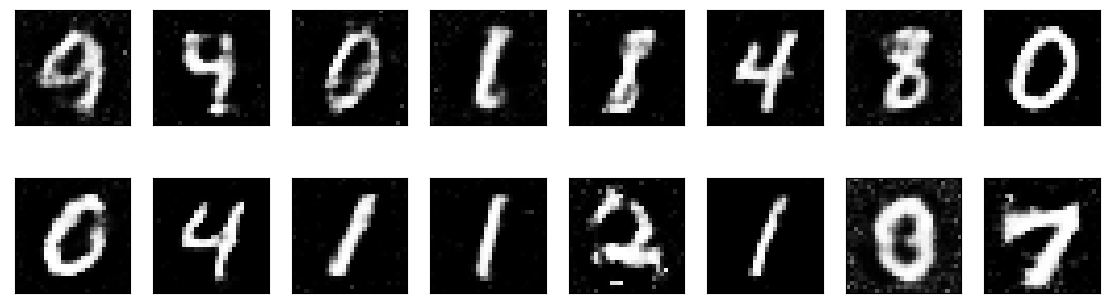

2024-03-07 07:12:18 | Epoch [74/100] | Batch 0/469 | d_loss: 1.1534 | g_loss: 1.3136
2024-03-07 07:12:19 | Epoch [74/100] | Batch 100/469 | d_loss: 1.1049 | g_loss: 1.3874
2024-03-07 07:12:21 | Epoch [74/100] | Batch 200/469 | d_loss: 1.0886 | g_loss: 1.3391
2024-03-07 07:12:22 | Epoch [74/100] | Batch 300/469 | d_loss: 1.1241 | g_loss: 1.2412
2024-03-07 07:12:23 | Epoch [74/100] | Batch 400/469 | d_loss: 1.1853 | g_loss: 1.3290


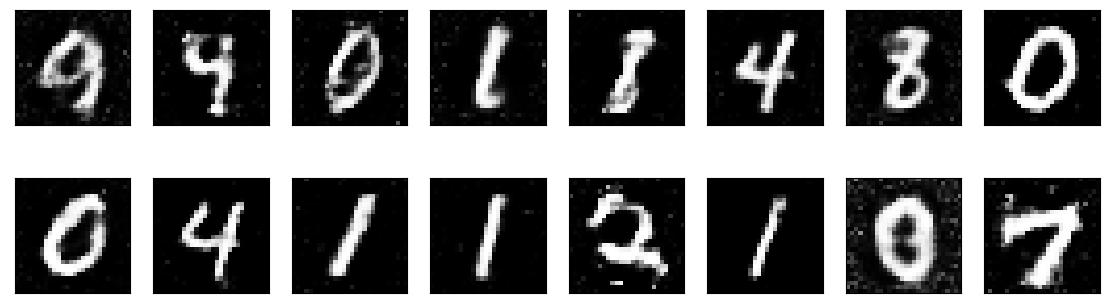

2024-03-07 07:12:25 | Epoch [75/100] | Batch 0/469 | d_loss: 1.0999 | g_loss: 1.2768
2024-03-07 07:12:26 | Epoch [75/100] | Batch 100/469 | d_loss: 1.0855 | g_loss: 1.2109
2024-03-07 07:12:28 | Epoch [75/100] | Batch 200/469 | d_loss: 1.1371 | g_loss: 1.2644
2024-03-07 07:12:29 | Epoch [75/100] | Batch 300/469 | d_loss: 1.1069 | g_loss: 1.2323
2024-03-07 07:12:30 | Epoch [75/100] | Batch 400/469 | d_loss: 1.1490 | g_loss: 1.2273


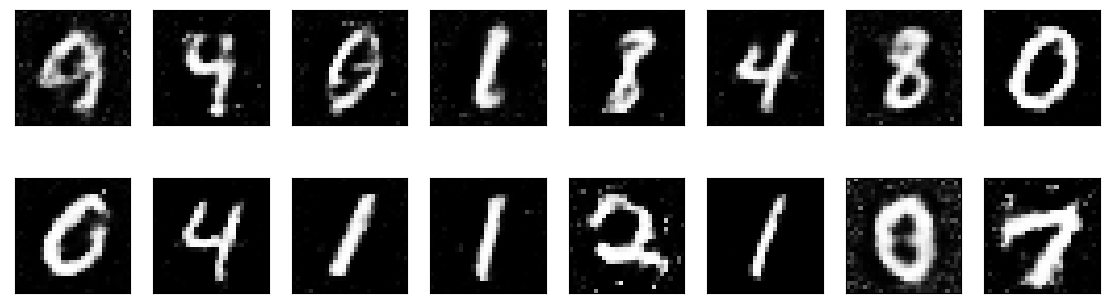

2024-03-07 07:12:32 | Epoch [76/100] | Batch 0/469 | d_loss: 1.1305 | g_loss: 1.1908
2024-03-07 07:12:34 | Epoch [76/100] | Batch 100/469 | d_loss: 1.2077 | g_loss: 1.2945
2024-03-07 07:12:35 | Epoch [76/100] | Batch 200/469 | d_loss: 1.1799 | g_loss: 1.2302
2024-03-07 07:12:36 | Epoch [76/100] | Batch 300/469 | d_loss: 1.1758 | g_loss: 1.2891
2024-03-07 07:12:38 | Epoch [76/100] | Batch 400/469 | d_loss: 1.1412 | g_loss: 1.2667


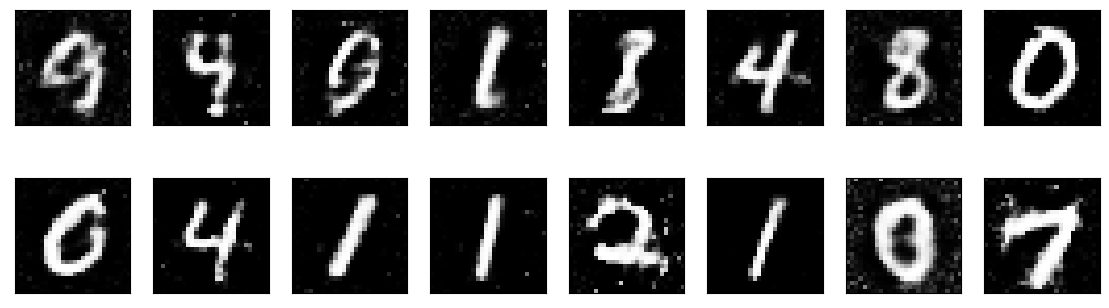

2024-03-07 07:12:40 | Epoch [77/100] | Batch 0/469 | d_loss: 1.1320 | g_loss: 1.2724
2024-03-07 07:12:41 | Epoch [77/100] | Batch 100/469 | d_loss: 1.1328 | g_loss: 1.3495
2024-03-07 07:12:43 | Epoch [77/100] | Batch 200/469 | d_loss: 1.0587 | g_loss: 1.2324
2024-03-07 07:12:44 | Epoch [77/100] | Batch 300/469 | d_loss: 1.0973 | g_loss: 1.2941
2024-03-07 07:12:46 | Epoch [77/100] | Batch 400/469 | d_loss: 1.1500 | g_loss: 1.2656


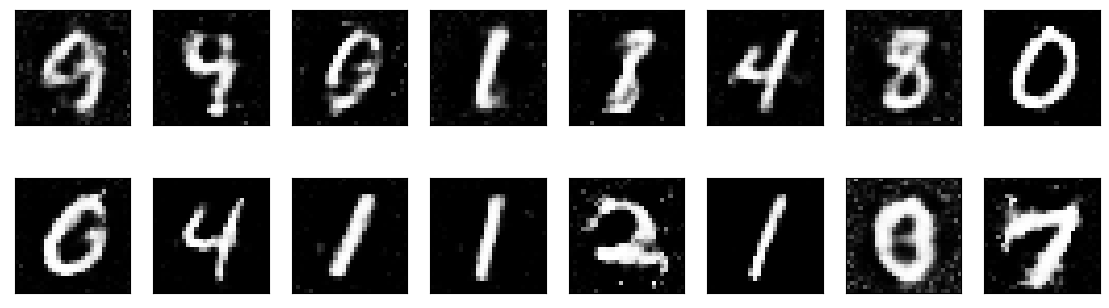

2024-03-07 07:12:48 | Epoch [78/100] | Batch 0/469 | d_loss: 1.1475 | g_loss: 1.2733
2024-03-07 07:12:49 | Epoch [78/100] | Batch 100/469 | d_loss: 1.1316 | g_loss: 1.3142
2024-03-07 07:12:51 | Epoch [78/100] | Batch 200/469 | d_loss: 1.1578 | g_loss: 1.3144
2024-03-07 07:12:52 | Epoch [78/100] | Batch 300/469 | d_loss: 1.1278 | g_loss: 1.2623
2024-03-07 07:12:54 | Epoch [78/100] | Batch 400/469 | d_loss: 1.1471 | g_loss: 1.2063


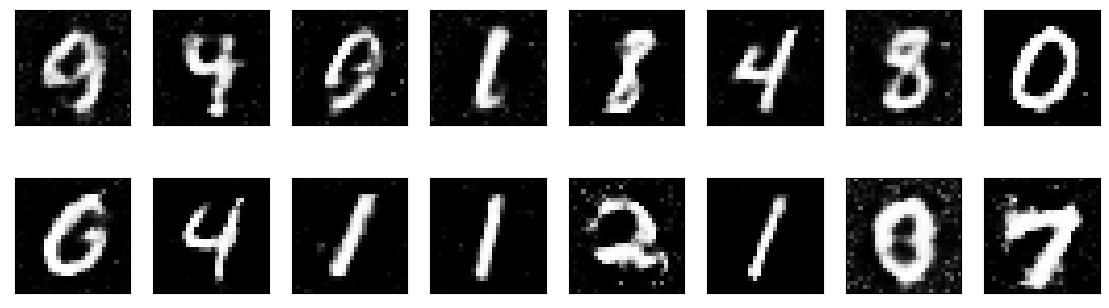

2024-03-07 07:12:56 | Epoch [79/100] | Batch 0/469 | d_loss: 1.1389 | g_loss: 1.2886
2024-03-07 07:12:57 | Epoch [79/100] | Batch 100/469 | d_loss: 1.1591 | g_loss: 1.3396
2024-03-07 07:12:59 | Epoch [79/100] | Batch 200/469 | d_loss: 1.0754 | g_loss: 1.3652
2024-03-07 07:13:00 | Epoch [79/100] | Batch 300/469 | d_loss: 1.2150 | g_loss: 1.2965
2024-03-07 07:13:02 | Epoch [79/100] | Batch 400/469 | d_loss: 1.0913 | g_loss: 1.3524


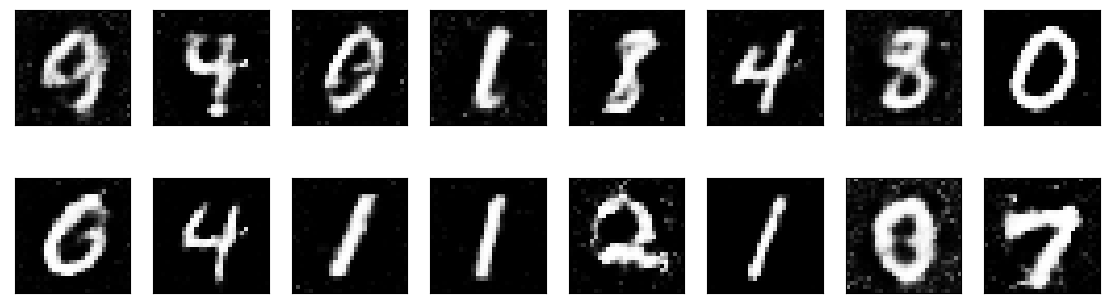

2024-03-07 07:13:04 | Epoch [80/100] | Batch 0/469 | d_loss: 1.0724 | g_loss: 1.3126
2024-03-07 07:13:05 | Epoch [80/100] | Batch 100/469 | d_loss: 1.0603 | g_loss: 1.2010
2024-03-07 07:13:06 | Epoch [80/100] | Batch 200/469 | d_loss: 1.0802 | g_loss: 1.3590
2024-03-07 07:13:08 | Epoch [80/100] | Batch 300/469 | d_loss: 1.1191 | g_loss: 1.3184
2024-03-07 07:13:09 | Epoch [80/100] | Batch 400/469 | d_loss: 1.1707 | g_loss: 1.2933


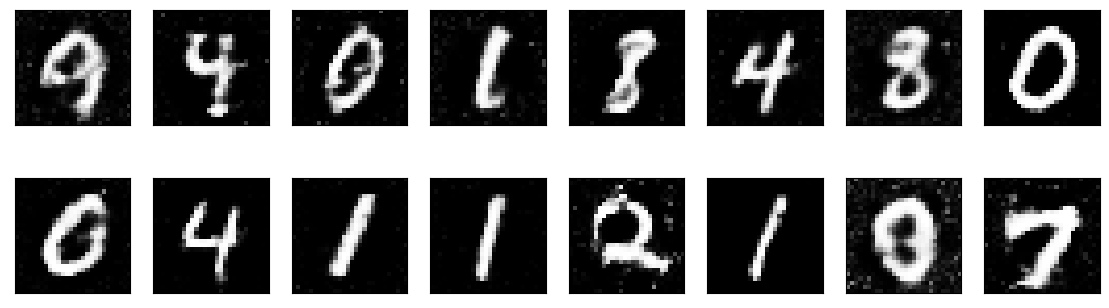

2024-03-07 07:13:11 | Epoch [81/100] | Batch 0/469 | d_loss: 1.1127 | g_loss: 1.3019
2024-03-07 07:13:12 | Epoch [81/100] | Batch 100/469 | d_loss: 1.0572 | g_loss: 1.3160
2024-03-07 07:13:14 | Epoch [81/100] | Batch 200/469 | d_loss: 1.0632 | g_loss: 1.2551
2024-03-07 07:13:15 | Epoch [81/100] | Batch 300/469 | d_loss: 1.0787 | g_loss: 1.2137
2024-03-07 07:13:17 | Epoch [81/100] | Batch 400/469 | d_loss: 1.1161 | g_loss: 1.3456


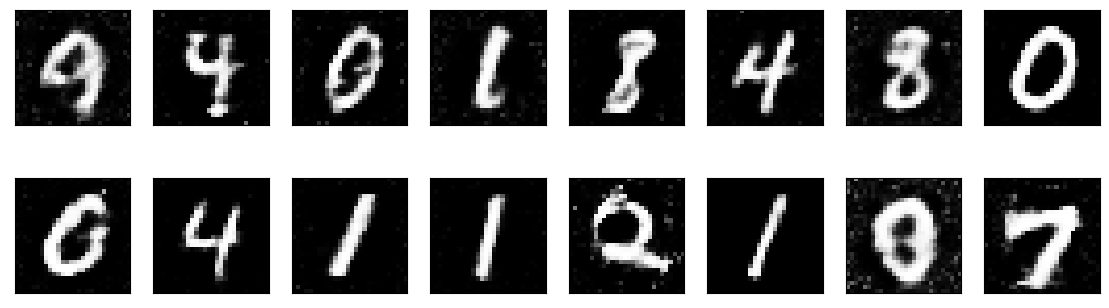

2024-03-07 07:13:18 | Epoch [82/100] | Batch 0/469 | d_loss: 1.1582 | g_loss: 1.2690
2024-03-07 07:13:19 | Epoch [82/100] | Batch 100/469 | d_loss: 1.0912 | g_loss: 1.3518
2024-03-07 07:13:21 | Epoch [82/100] | Batch 200/469 | d_loss: 1.1342 | g_loss: 1.2325
2024-03-07 07:13:22 | Epoch [82/100] | Batch 300/469 | d_loss: 1.1039 | g_loss: 1.3848
2024-03-07 07:13:23 | Epoch [82/100] | Batch 400/469 | d_loss: 1.1481 | g_loss: 1.2726


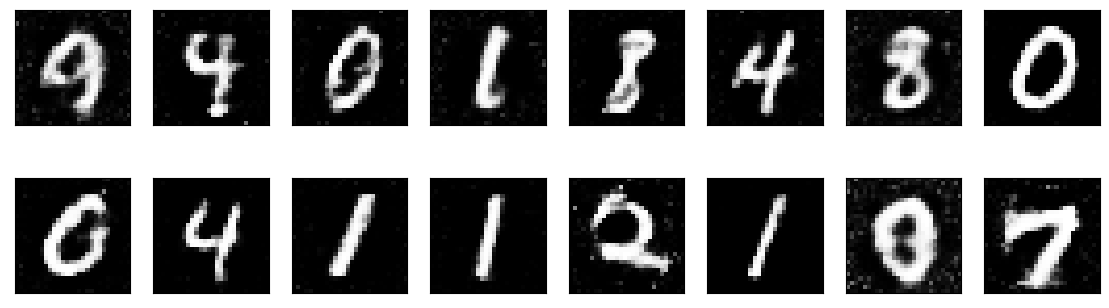

2024-03-07 07:13:26 | Epoch [83/100] | Batch 0/469 | d_loss: 1.1099 | g_loss: 1.3395
2024-03-07 07:13:27 | Epoch [83/100] | Batch 100/469 | d_loss: 1.1327 | g_loss: 1.2981
2024-03-07 07:13:29 | Epoch [83/100] | Batch 200/469 | d_loss: 1.1485 | g_loss: 1.2784
2024-03-07 07:13:30 | Epoch [83/100] | Batch 300/469 | d_loss: 1.1663 | g_loss: 1.3307
2024-03-07 07:13:31 | Epoch [83/100] | Batch 400/469 | d_loss: 1.1261 | g_loss: 1.3104


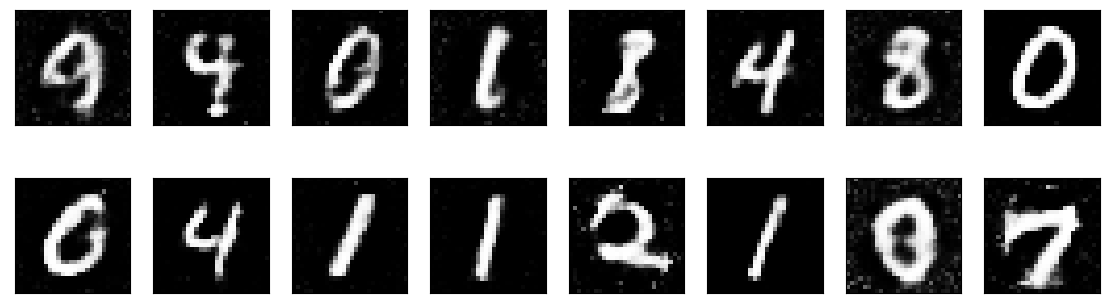

2024-03-07 07:13:33 | Epoch [84/100] | Batch 0/469 | d_loss: 1.1059 | g_loss: 1.3641
2024-03-07 07:13:35 | Epoch [84/100] | Batch 100/469 | d_loss: 1.0737 | g_loss: 1.2859
2024-03-07 07:13:36 | Epoch [84/100] | Batch 200/469 | d_loss: 1.1221 | g_loss: 1.4020
2024-03-07 07:13:38 | Epoch [84/100] | Batch 300/469 | d_loss: 1.0358 | g_loss: 1.2730
2024-03-07 07:13:39 | Epoch [84/100] | Batch 400/469 | d_loss: 1.1767 | g_loss: 1.3155


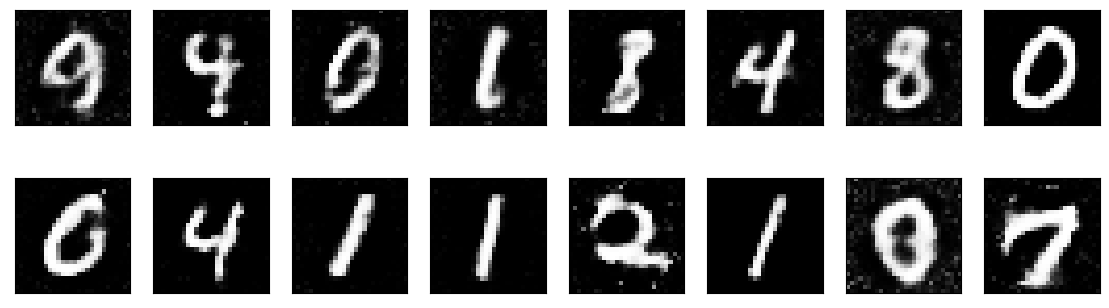

2024-03-07 07:13:41 | Epoch [85/100] | Batch 0/469 | d_loss: 1.1187 | g_loss: 1.2301
2024-03-07 07:13:43 | Epoch [85/100] | Batch 100/469 | d_loss: 1.0960 | g_loss: 1.3628
2024-03-07 07:13:45 | Epoch [85/100] | Batch 200/469 | d_loss: 1.1439 | g_loss: 1.3271
2024-03-07 07:13:46 | Epoch [85/100] | Batch 300/469 | d_loss: 1.0823 | g_loss: 1.3095
2024-03-07 07:13:48 | Epoch [85/100] | Batch 400/469 | d_loss: 1.1444 | g_loss: 1.1918


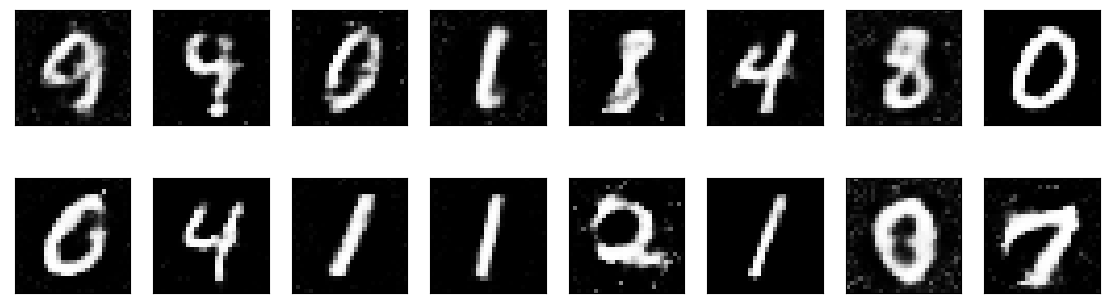

2024-03-07 07:13:50 | Epoch [86/100] | Batch 0/469 | d_loss: 1.0739 | g_loss: 1.3160
2024-03-07 07:13:51 | Epoch [86/100] | Batch 100/469 | d_loss: 1.0441 | g_loss: 1.2539
2024-03-07 07:13:53 | Epoch [86/100] | Batch 200/469 | d_loss: 1.1405 | g_loss: 1.2870
2024-03-07 07:13:54 | Epoch [86/100] | Batch 300/469 | d_loss: 1.0963 | g_loss: 1.2387
2024-03-07 07:13:56 | Epoch [86/100] | Batch 400/469 | d_loss: 1.1408 | g_loss: 1.3120


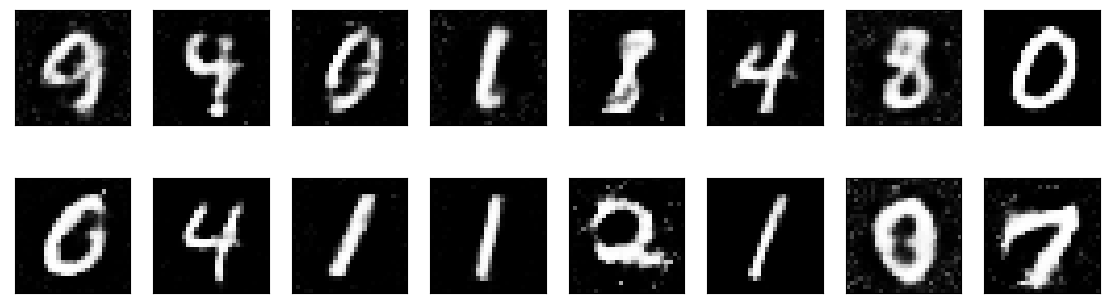

2024-03-07 07:13:57 | Epoch [87/100] | Batch 0/469 | d_loss: 1.0898 | g_loss: 1.3899
2024-03-07 07:13:59 | Epoch [87/100] | Batch 100/469 | d_loss: 1.0858 | g_loss: 1.4092
2024-03-07 07:14:00 | Epoch [87/100] | Batch 200/469 | d_loss: 1.0812 | g_loss: 1.2375
2024-03-07 07:14:02 | Epoch [87/100] | Batch 300/469 | d_loss: 1.0934 | g_loss: 1.1703
2024-03-07 07:14:03 | Epoch [87/100] | Batch 400/469 | d_loss: 1.1355 | g_loss: 1.3683


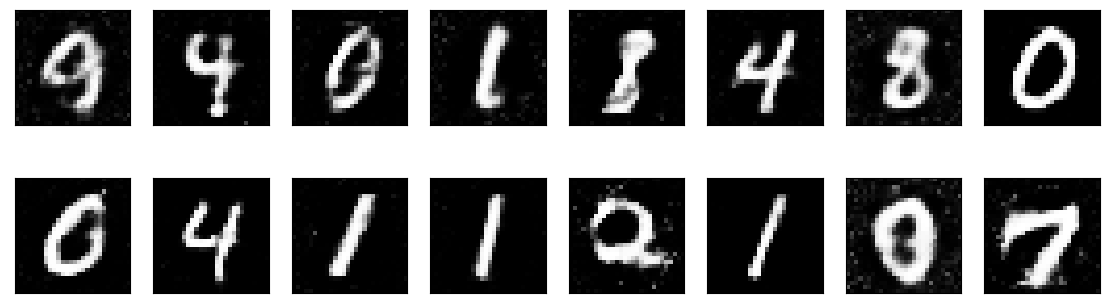

2024-03-07 07:14:05 | Epoch [88/100] | Batch 0/469 | d_loss: 1.1099 | g_loss: 1.3110
2024-03-07 07:14:06 | Epoch [88/100] | Batch 100/469 | d_loss: 1.0568 | g_loss: 1.3289
2024-03-07 07:14:08 | Epoch [88/100] | Batch 200/469 | d_loss: 1.0253 | g_loss: 1.2749
2024-03-07 07:14:09 | Epoch [88/100] | Batch 300/469 | d_loss: 1.1427 | g_loss: 1.3161
2024-03-07 07:14:11 | Epoch [88/100] | Batch 400/469 | d_loss: 1.1747 | g_loss: 1.2792


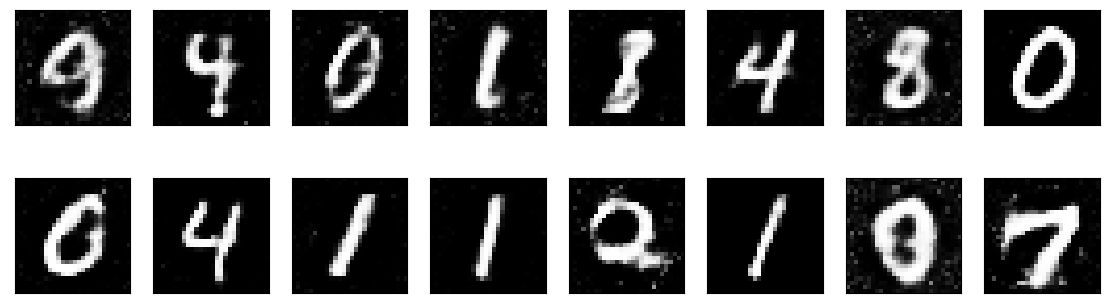

2024-03-07 07:14:13 | Epoch [89/100] | Batch 0/469 | d_loss: 1.1282 | g_loss: 1.4802
2024-03-07 07:14:14 | Epoch [89/100] | Batch 100/469 | d_loss: 1.1245 | g_loss: 1.2197
2024-03-07 07:14:15 | Epoch [89/100] | Batch 200/469 | d_loss: 1.0630 | g_loss: 1.2550
2024-03-07 07:14:16 | Epoch [89/100] | Batch 300/469 | d_loss: 1.1462 | g_loss: 1.2910
2024-03-07 07:14:18 | Epoch [89/100] | Batch 400/469 | d_loss: 1.2163 | g_loss: 1.3045


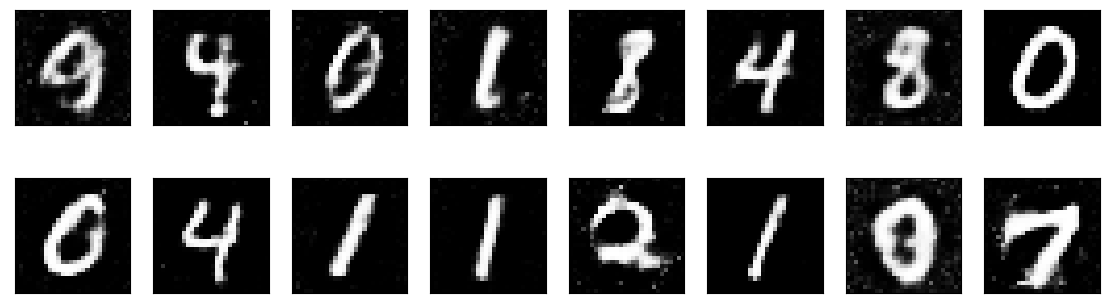

2024-03-07 07:14:20 | Epoch [90/100] | Batch 0/469 | d_loss: 1.1788 | g_loss: 1.3245
2024-03-07 07:14:21 | Epoch [90/100] | Batch 100/469 | d_loss: 1.1403 | g_loss: 1.3655
2024-03-07 07:14:23 | Epoch [90/100] | Batch 200/469 | d_loss: 1.1335 | g_loss: 1.3317
2024-03-07 07:14:24 | Epoch [90/100] | Batch 300/469 | d_loss: 1.0713 | g_loss: 1.2705
2024-03-07 07:14:25 | Epoch [90/100] | Batch 400/469 | d_loss: 1.1414 | g_loss: 1.2791


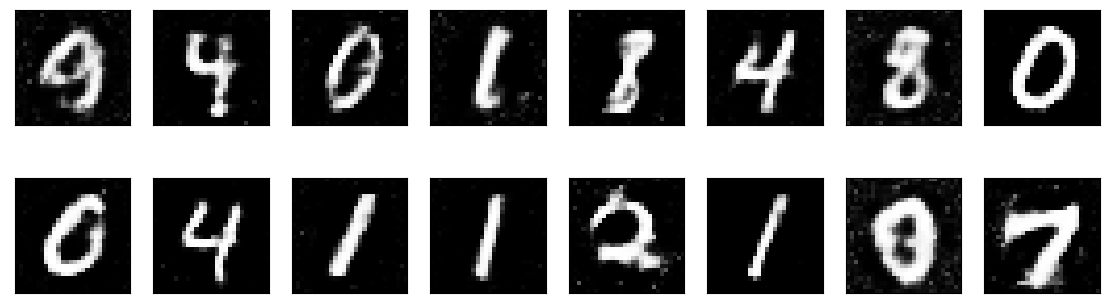

2024-03-07 07:14:27 | Epoch [91/100] | Batch 0/469 | d_loss: 1.1319 | g_loss: 1.3824
2024-03-07 07:14:29 | Epoch [91/100] | Batch 100/469 | d_loss: 1.1328 | g_loss: 1.5002
2024-03-07 07:14:30 | Epoch [91/100] | Batch 200/469 | d_loss: 1.1167 | g_loss: 1.1930
2024-03-07 07:14:32 | Epoch [91/100] | Batch 300/469 | d_loss: 1.1121 | g_loss: 1.2797
2024-03-07 07:14:33 | Epoch [91/100] | Batch 400/469 | d_loss: 1.0943 | g_loss: 1.2517


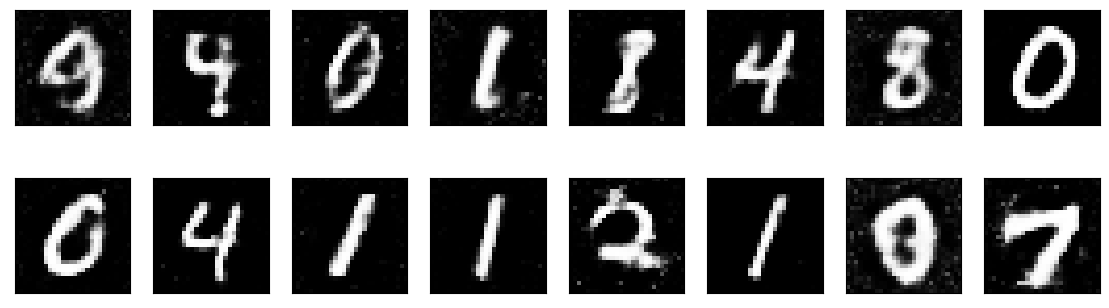

2024-03-07 07:14:34 | Epoch [92/100] | Batch 0/469 | d_loss: 1.0567 | g_loss: 1.4172
2024-03-07 07:14:36 | Epoch [92/100] | Batch 100/469 | d_loss: 1.0397 | g_loss: 1.3548
2024-03-07 07:14:37 | Epoch [92/100] | Batch 200/469 | d_loss: 1.0918 | g_loss: 1.3179
2024-03-07 07:14:38 | Epoch [92/100] | Batch 300/469 | d_loss: 1.1651 | g_loss: 1.4049
2024-03-07 07:14:39 | Epoch [92/100] | Batch 400/469 | d_loss: 1.1438 | g_loss: 1.2805


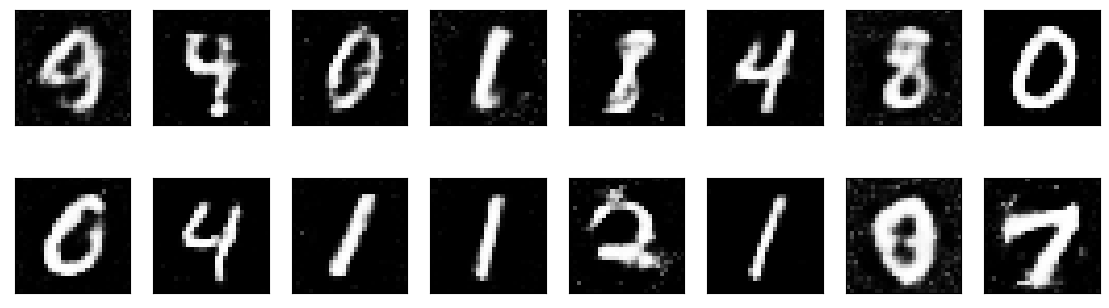

2024-03-07 07:14:41 | Epoch [93/100] | Batch 0/469 | d_loss: 1.1405 | g_loss: 1.2689
2024-03-07 07:14:42 | Epoch [93/100] | Batch 100/469 | d_loss: 1.0721 | g_loss: 1.4035
2024-03-07 07:14:43 | Epoch [93/100] | Batch 200/469 | d_loss: 1.1297 | g_loss: 1.2832
2024-03-07 07:14:45 | Epoch [93/100] | Batch 300/469 | d_loss: 1.1252 | g_loss: 1.2461
2024-03-07 07:14:46 | Epoch [93/100] | Batch 400/469 | d_loss: 1.2408 | g_loss: 1.3649


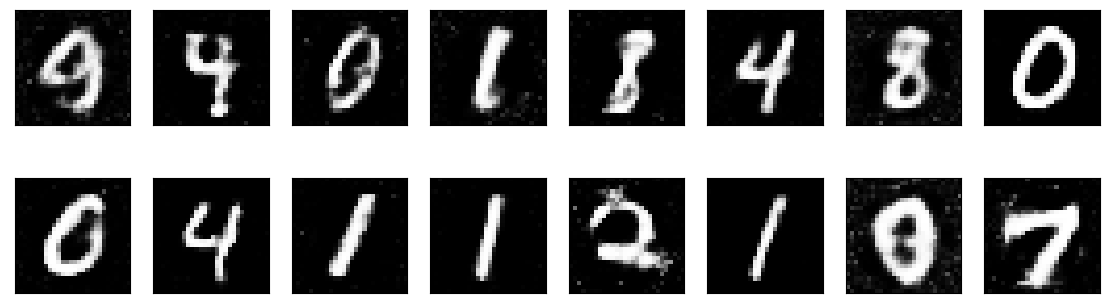

2024-03-07 07:14:48 | Epoch [94/100] | Batch 0/469 | d_loss: 1.0740 | g_loss: 1.3443
2024-03-07 07:14:49 | Epoch [94/100] | Batch 100/469 | d_loss: 1.1078 | g_loss: 1.3680
2024-03-07 07:14:51 | Epoch [94/100] | Batch 200/469 | d_loss: 1.0570 | g_loss: 1.2343
2024-03-07 07:14:52 | Epoch [94/100] | Batch 300/469 | d_loss: 1.1154 | g_loss: 1.2660
2024-03-07 07:14:54 | Epoch [94/100] | Batch 400/469 | d_loss: 1.1697 | g_loss: 1.3246


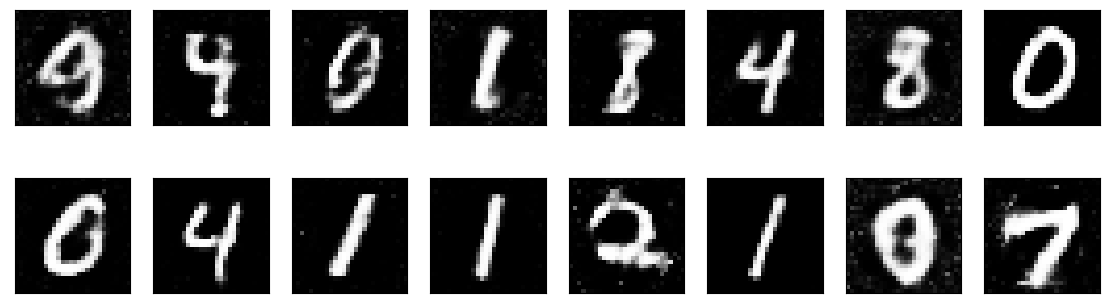

2024-03-07 07:14:56 | Epoch [95/100] | Batch 0/469 | d_loss: 1.1505 | g_loss: 1.3027
2024-03-07 07:14:57 | Epoch [95/100] | Batch 100/469 | d_loss: 1.0394 | g_loss: 1.2942
2024-03-07 07:14:59 | Epoch [95/100] | Batch 200/469 | d_loss: 1.1627 | g_loss: 1.3111
2024-03-07 07:15:00 | Epoch [95/100] | Batch 300/469 | d_loss: 1.1169 | g_loss: 1.2957
2024-03-07 07:15:01 | Epoch [95/100] | Batch 400/469 | d_loss: 1.1083 | g_loss: 1.3413


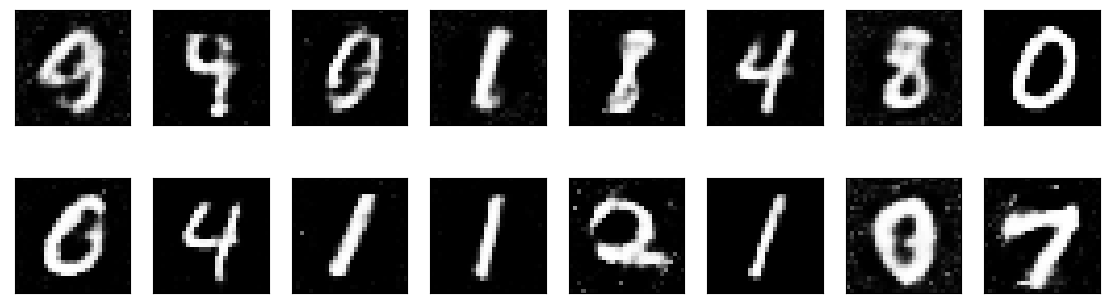

2024-03-07 07:15:04 | Epoch [96/100] | Batch 0/469 | d_loss: 1.0409 | g_loss: 1.2990
2024-03-07 07:15:05 | Epoch [96/100] | Batch 100/469 | d_loss: 1.1522 | g_loss: 1.3897
2024-03-07 07:15:06 | Epoch [96/100] | Batch 200/469 | d_loss: 1.1281 | g_loss: 1.3153
2024-03-07 07:15:08 | Epoch [96/100] | Batch 300/469 | d_loss: 1.0765 | g_loss: 1.3183
2024-03-07 07:15:09 | Epoch [96/100] | Batch 400/469 | d_loss: 1.1319 | g_loss: 1.3005


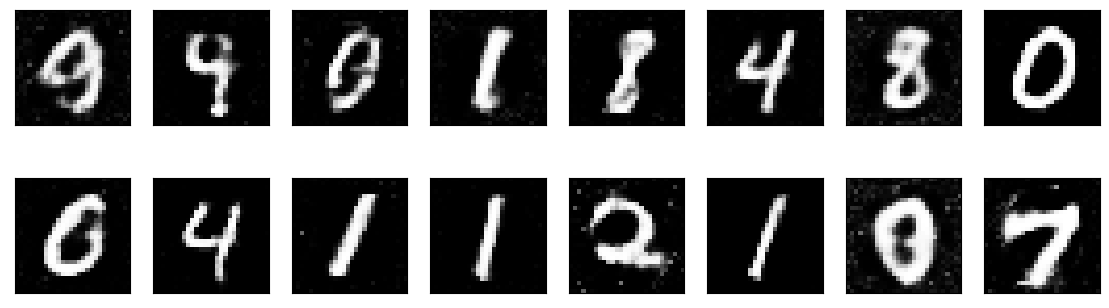

2024-03-07 07:15:10 | Epoch [97/100] | Batch 0/469 | d_loss: 1.1134 | g_loss: 1.4084
2024-03-07 07:15:12 | Epoch [97/100] | Batch 100/469 | d_loss: 1.1017 | g_loss: 1.3590
2024-03-07 07:15:13 | Epoch [97/100] | Batch 200/469 | d_loss: 1.1131 | g_loss: 1.3236
2024-03-07 07:15:14 | Epoch [97/100] | Batch 300/469 | d_loss: 1.1580 | g_loss: 1.2919
2024-03-07 07:15:16 | Epoch [97/100] | Batch 400/469 | d_loss: 1.1456 | g_loss: 1.3923


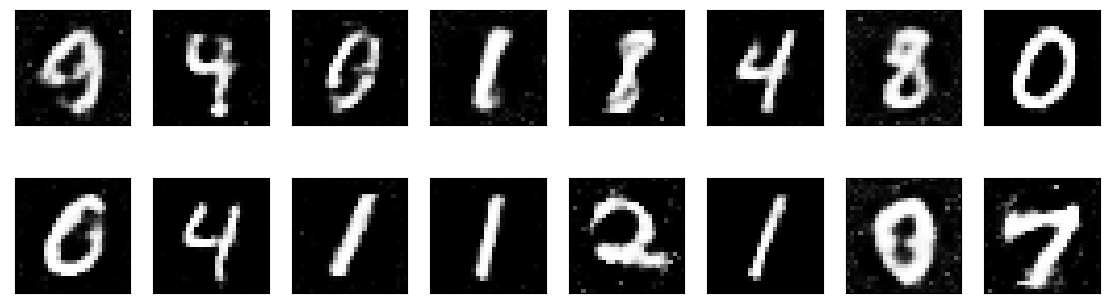

2024-03-07 07:15:18 | Epoch [98/100] | Batch 0/469 | d_loss: 1.0451 | g_loss: 1.3318
2024-03-07 07:15:19 | Epoch [98/100] | Batch 100/469 | d_loss: 1.1567 | g_loss: 1.4746
2024-03-07 07:15:21 | Epoch [98/100] | Batch 200/469 | d_loss: 1.1133 | g_loss: 1.2699
2024-03-07 07:15:22 | Epoch [98/100] | Batch 300/469 | d_loss: 1.1008 | g_loss: 1.3389
2024-03-07 07:15:23 | Epoch [98/100] | Batch 400/469 | d_loss: 1.1893 | g_loss: 1.2693


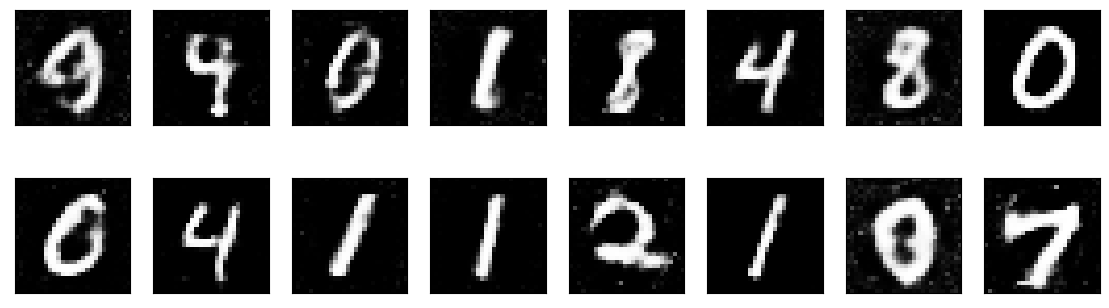

2024-03-07 07:15:25 | Epoch [99/100] | Batch 0/469 | d_loss: 1.0805 | g_loss: 1.4746
2024-03-07 07:15:27 | Epoch [99/100] | Batch 100/469 | d_loss: 1.0825 | g_loss: 1.3047
2024-03-07 07:15:28 | Epoch [99/100] | Batch 200/469 | d_loss: 1.1202 | g_loss: 1.3797
2024-03-07 07:15:30 | Epoch [99/100] | Batch 300/469 | d_loss: 1.0590 | g_loss: 1.2619
2024-03-07 07:15:32 | Epoch [99/100] | Batch 400/469 | d_loss: 1.1537 | g_loss: 1.3182


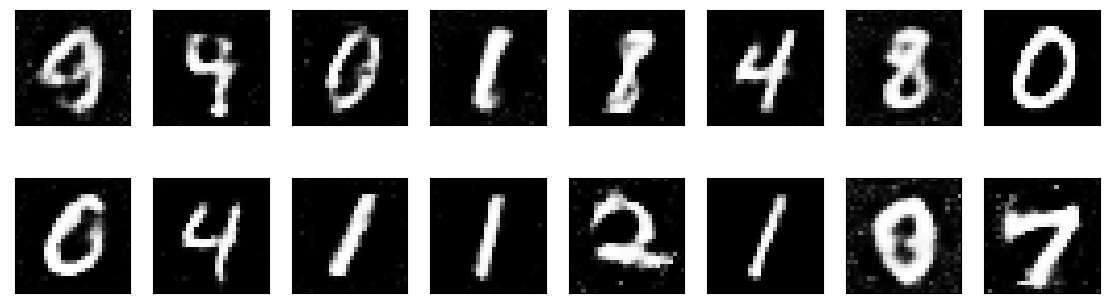

2024-03-07 07:15:34 | Epoch [100/100] | Batch 0/469 | d_loss: 1.0963 | g_loss: 1.3875
2024-03-07 07:15:35 | Epoch [100/100] | Batch 100/469 | d_loss: 1.1086 | g_loss: 1.3072
2024-03-07 07:15:36 | Epoch [100/100] | Batch 200/469 | d_loss: 1.0946 | g_loss: 1.2274
2024-03-07 07:15:38 | Epoch [100/100] | Batch 300/469 | d_loss: 1.1306 | g_loss: 1.2195
2024-03-07 07:15:39 | Epoch [100/100] | Batch 400/469 | d_loss: 1.1624 | g_loss: 1.3335


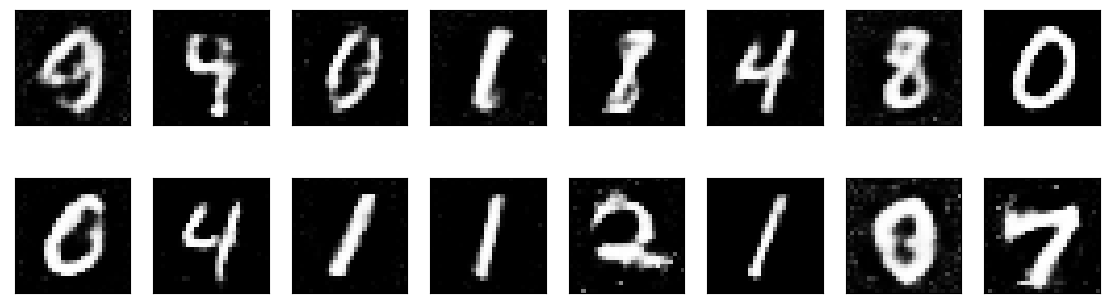

In [10]:
losses, samples = training(model_G, model_D, z_size, g_optimizer, d_optimizer, real_loss_vanilla, fake_loss_vanilla, g_scheduler, d_scheduler, num_epochs, train_loader,  device='cuda')

Training loss

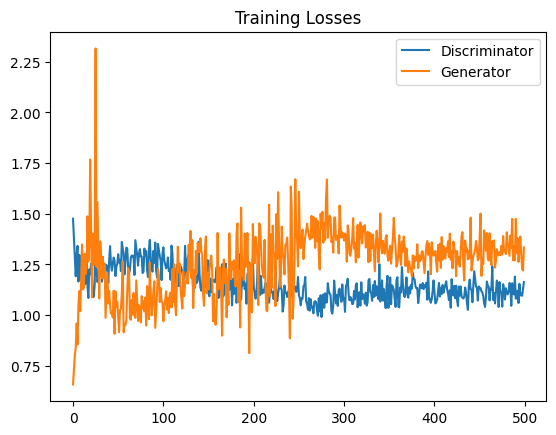

In [11]:
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='Discriminator')
plt.plot(losses.T[1], label='Generator')
plt.title("Training Losses")
plt.legend()

In [12]:
import pickle as pkl
from training_helper import view_samples

In [13]:
# Load samples from generator, taken while training
with open('train_samples.pkl', 'rb') as f:
    samples = pkl.load(f)

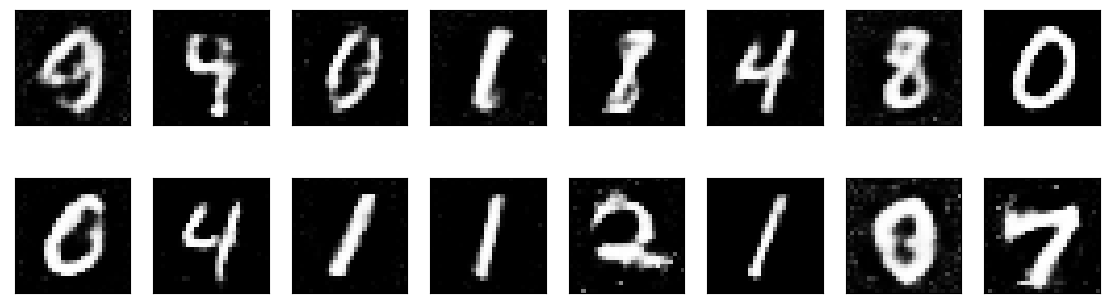

In [14]:
# -1 indicates final epoch's samples (the last in the list)
view_samples(-1, samples)

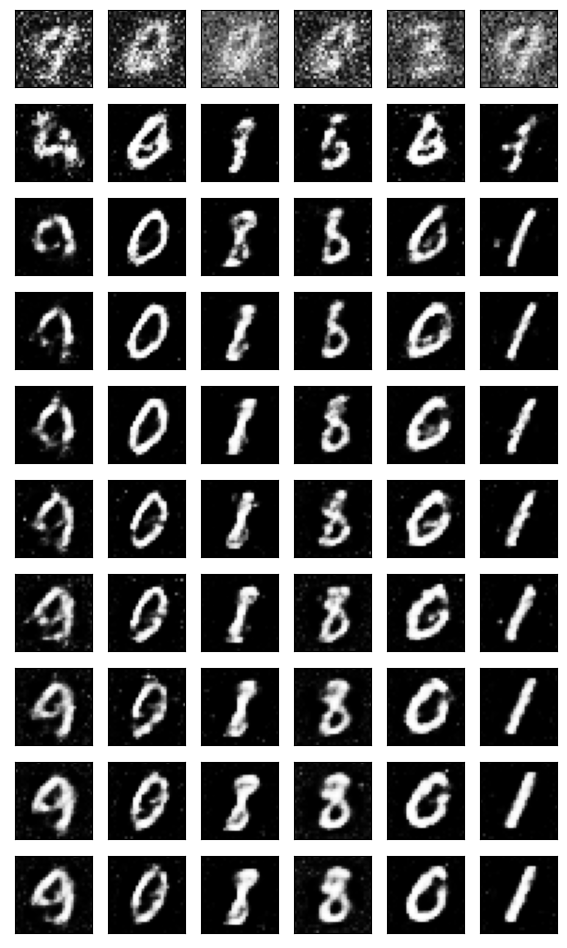

In [16]:
rows = 10  # split epochs into 10, so 100/10 = every 10 epochs
cols = 6
fig, axes = plt.subplots(figsize=(7, 12), nrows=rows, ncols=cols, sharex=True, sharey=True)

for sample, ax_row in zip(samples[::int(len(samples) / rows)], axes):
    for img, ax in zip(sample[::int(len(sample) / cols)], ax_row):
        img = img.detach().cpu()  # Move the tensor to CPU before converting to NumPy
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

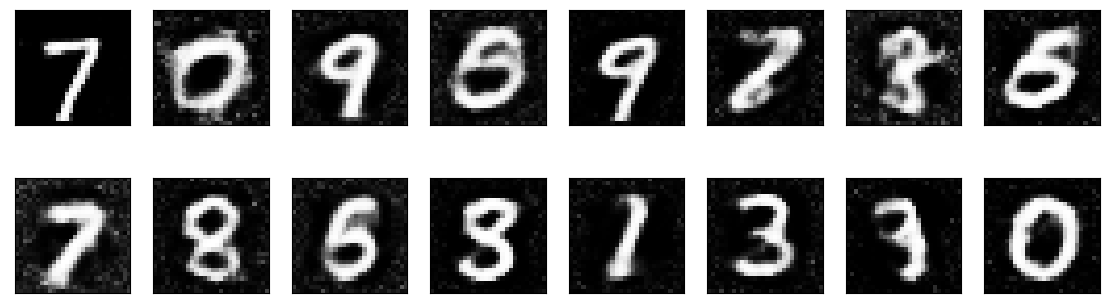

In [18]:
# randomly generated, new latent vectors
sample_size = 16
rand_z = np.random.uniform(-1, 1, size=(sample_size, z_size))
rand_z = torch.from_numpy(rand_z).float().to('cuda')  # Move rand_z to the GPU

model_G.eval()  # eval mode
# generated samples
rand_images = G(rand_z)

# 0 indicates the first set of samples in the passed in list
# and we only have one batch of samples, here
view_samples(0, [rand_images])